# Project Description

Weather forecasting is the application of science and technology to predict the conditions of the atmosphere for a given location and time. Weather forecasts are made by collecting quantitative data about the current state of the atmosphere at a given place and using meteorology to project how the atmosphere will change.
Rain Dataset is to predict whether or not it will rain tomorrow. The Dataset contains about 10 years of daily weather observations of different locations in Australia. Here, predict two things:


# 1. Problem Statement: 

a) Design a predictive model with the use of machine learning algorithms to forecast whether or not it will rain tomorrow.
b)  Design a predictive model with the use of machine learning algorithms to predict how much rainfall could be there.



Dataset Description:
Number of columns: 23


Date  - The date of observation

Location  -The common name of the location of the weather station

MinTemp  -The minimum temperature in degrees celsius

MaxTemp -The maximum temperature in degrees celsius

Rainfall  -The amount of rainfall recorded for the day in mm

Evaporation  -The so-called Class A pan evaporation (mm) in the 24 hours to 9am

Sunshine  -The number of hours of bright sunshine in the day.

WindGustDi r- The direction of the strongest wind gust in the 24 hours to midnight

WindGustSpeed -The speed (km/h) of the strongest wind gust in the 24 hours to midnight

WindDir9am -Direction of the wind at 9am

WindDir3pm -Direction of the wind at 3pm

WindSpeed9am -Wind speed (km/hr) averaged over 10 minutes prior to 9am

WindSpeed3pm -Wind speed (km/hr) averaged over 10 minutes prior to 3pm

Humidity9am -Humidity (percent) at 9am

Humidity3pm -Humidity (percent) at 3pm

Pressure9am -Atmospheric pressure (hpa) reduced to mean sea level at 9am

Pressure3pm -Atmospheric pressure (hpa) reduced to mean sea level at 3pm

Cloud9am - Fraction of sky obscured by cloud at 9am.

Cloud3pm -Fraction of sky obscured by cloud

Temp9am-Temperature (degrees C) at 9am

Temp3pm -Temperature (degrees C) at 3pm

RainToday -Boolean: 1 if precipitation (mm) in the 24 hours to 9am exceeds 1mm, otherwise 0

RainTomorrow -The amount of next day rain in mm. Used to create response variable . A kind of measure of the "risk".


In [1]:
#Importing the libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings("ignore")

In [2]:
#Loading the dataset given
import requests
import pandas as pd

df = pd.read_csv("weatherAUS.csv")

In [3]:
df.head()

Date Location  MinTemp  MaxTemp  Rainfall  Evaporation  Sunshine  \
0  2008-12-01   Albury     13.4     22.9       0.6          NaN       NaN   
1  2008-12-02   Albury      7.4     25.1       0.0          NaN       NaN   
2  2008-12-03   Albury     12.9     25.7       0.0          NaN       NaN   
3  2008-12-04   Albury      9.2     28.0       0.0          NaN       NaN   
4  2008-12-05   Albury     17.5     32.3       1.0          NaN       NaN   

  WindGustDir  WindGustSpeed WindDir9am  ... Humidity9am  Humidity3pm  \
0           W           44.0          W  ...        71.0         22.0   
1         WNW           44.0        NNW  ...        44.0         25.0   
2         WSW           46.0          W  ...        38.0         30.0   
3          NE           24.0         SE  ...        45.0         16.0   
4           W           41.0        ENE  ...        82.0         33.0   

   Pressure9am  Pressure3pm  Cloud9am  Cloud3pm  Temp9am  Temp3pm  RainToday  \
0       1007.7       1007.1       8.0       NaN     16.9     21.8         No   
1       1010.6       1007.8       NaN       NaN     17.2     24.3         No   
2       1007.6       1008.7       NaN       2.0     21.0     23.2         No   
3       1017.6       1012.8       NaN       NaN     18.1     26.5         No   
4       1010.8       1006.0       7.0       8.0     17.8     29.7         No   

   RainTomorrow  
0            No  
1            No  
2            No  
3            No  
4            No  

[5 rows x 23 columns]

In [4]:
#checking the columns of the dataset
df.columns

Index(['Date', 'Location', 'MinTemp', 'MaxTemp', 'Rainfall', 'Evaporation',
       'Sunshine', 'WindGustDir', 'WindGustSpeed', 'WindDir9am', 'WindDir3pm',
       'WindSpeed9am', 'WindSpeed3pm', 'Humidity9am', 'Humidity3pm',
       'Pressure9am', 'Pressure3pm', 'Cloud9am', 'Cloud3pm', 'Temp9am',
       'Temp3pm', 'RainToday', 'RainTomorrow'],
      dtype='object')

In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8425 entries, 0 to 8424
Data columns (total 23 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Date           8425 non-null   object 
 1   Location       8425 non-null   object 
 2   MinTemp        8350 non-null   float64
 3   MaxTemp        8365 non-null   float64
 4   Rainfall       8185 non-null   float64
 5   Evaporation    4913 non-null   float64
 6   Sunshine       4431 non-null   float64
 7   WindGustDir    7434 non-null   object 
 8   WindGustSpeed  7434 non-null   float64
 9   WindDir9am     7596 non-null   object 
 10  WindDir3pm     8117 non-null   object 
 11  WindSpeed9am   8349 non-null   float64
 12  WindSpeed3pm   8318 non-null   float64
 13  Humidity9am    8366 non-null   float64
 14  Humidity3pm    8323 non-null   float64
 15  Pressure9am    7116 non-null   float64
 16  Pressure3pm    7113 non-null   float64
 17  Cloud9am       6004 non-null   float64
 18  Cloud3pm

In [6]:
#there are 23 columns in the datset and 7 columns are of categorical and remaining are numerical

In [7]:
#dimension of the dataset
df.shape

(8425, 23)

There are 8425 rows and 23 columns of data

In [8]:
df.describe().T

count         mean        std    min      25%     50%     75%  \
MinTemp        8350.0    13.193305   5.403596   -2.0     9.20    13.3    17.4   
MaxTemp        8365.0    23.859976   6.136408    8.2    19.30    23.3    28.0   
Rainfall       8185.0     2.805913  10.459379    0.0     0.00     0.0     1.0   
Evaporation    4913.0     5.389395   5.044484    0.0     2.60     4.6     7.0   
Sunshine       4431.0     7.632205   3.896235    0.0     4.75     8.7    10.7   
WindGustSpeed  7434.0    40.174469  14.665721    7.0    30.00    39.0    50.0   
WindSpeed9am   8349.0    13.847646  10.174579    0.0     6.00    13.0    20.0   
WindSpeed3pm   8318.0    18.533662   9.766986    0.0    11.00    19.0    24.0   
Humidity9am    8366.0    67.822496  16.833283   10.0    56.00    68.0    80.0   
Humidity3pm    8323.0    51.249790  18.423774    6.0    39.00    51.0    63.0   
Pressure9am    7116.0  1017.640233   6.828699  989.8  1013.00  1017.7  1022.3   
Pressure3pm    7113.0  1015.236075   6.766681  982.9  1010.40  1015.3  1019.8   
Cloud9am       6004.0     4.566622   2.877658    0.0     1.00     5.0     7.0   
Cloud3pm       5970.0     4.503183   2.731659    0.0     2.00     5.0     7.0   
Temp9am        8369.0    17.762015   5.627035    1.9    13.80    17.8    21.9   
Temp3pm        8329.0    22.442934   5.980020    7.3    18.00    21.9    26.4   

                  max  
MinTemp          28.5  
MaxTemp          45.5  
Rainfall        371.0  
Evaporation     145.0  
Sunshine         13.9  
WindGustSpeed   107.0  
WindSpeed9am     63.0  
WindSpeed3pm     83.0  
Humidity9am     100.0  
Humidity3pm      99.0  
Pressure9am    1039.0  
Pressure3pm    1036.0  
Cloud9am          8.0  
Cloud3pm          8.0  
Temp9am          39.4  
Temp3pm          44.1

In [9]:
# Checking Null Values

df.isnull().sum()

Date                0
Location            0
MinTemp            75
MaxTemp            60
Rainfall          240
Evaporation      3512
Sunshine         3994
WindGustDir       991
WindGustSpeed     991
WindDir9am        829
WindDir3pm        308
WindSpeed9am       76
WindSpeed3pm      107
Humidity9am        59
Humidity3pm       102
Pressure9am      1309
Pressure3pm      1312
Cloud9am         2421
Cloud3pm         2455
Temp9am            56
Temp3pm            96
RainToday         240
RainTomorrow      239
dtype: int64

In [10]:
#checking the % of each column/features missing/Null values
round(df.isnull().sum()/df.shape[0]*100,2).sort_values(ascending=False)

Sunshine         47.41
Evaporation      41.69
Cloud3pm         29.14
Cloud9am         28.74
Pressure3pm      15.57
Pressure9am      15.54
WindGustDir      11.76
WindGustSpeed    11.76
WindDir9am        9.84
WindDir3pm        3.66
RainToday         2.85
Rainfall          2.85
RainTomorrow      2.84
WindSpeed3pm      1.27
Humidity3pm       1.21
Temp3pm           1.14
WindSpeed9am      0.90
MinTemp           0.89
MaxTemp           0.71
Humidity9am       0.70
Temp9am           0.66
Location          0.00
Date              0.00
dtype: float64

<AxesSubplot:>

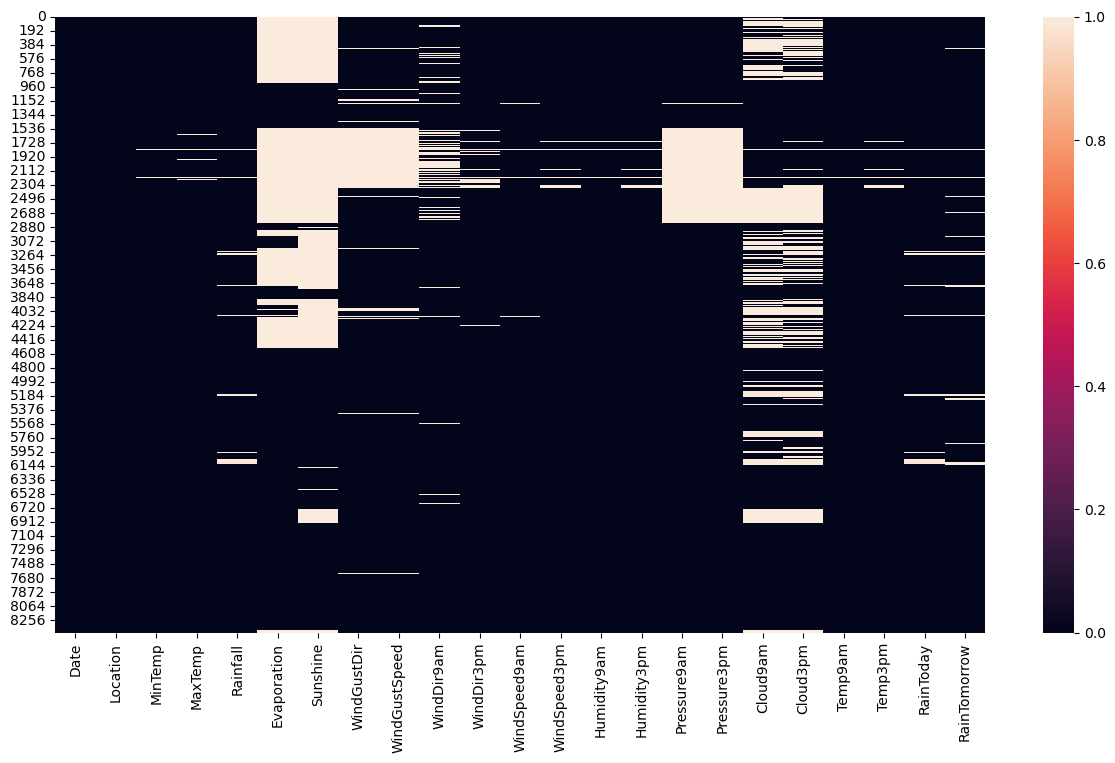

In [11]:
#Checking the null values through heatmap

plt.figure(figsize=(15,8))
sns.heatmap(df.isnull())

Evaporation and Sunshine having more than 40% Null data

In [12]:
#Seperating categorical and numerical/continuous columns into differenet lists

cat_col = []
for i in df.columns:
    if df[i].dtypes=='object':
        cat_col.append(i)
        
cat_col
#cat_col=[col for i in df.columns if df[i].dtypes=='object']
#num_col=[col for i in df.columns if df[i].dtypes!='object']

['Date',
 'Location',
 'WindGustDir',
 'WindDir9am',
 'WindDir3pm',
 'RainToday',
 'RainTomorrow']

In [13]:
#Numerical/Continous data type feature columns
num_col = []
for i in df.columns:
    if df[i].dtypes!='object':
        num_col.append(i)
        
num_col

['MinTemp',
 'MaxTemp',
 'Rainfall',
 'Evaporation',
 'Sunshine',
 'WindGustSpeed',
 'WindSpeed9am',
 'WindSpeed3pm',
 'Humidity9am',
 'Humidity3pm',
 'Pressure9am',
 'Pressure3pm',
 'Cloud9am',
 'Cloud3pm',
 'Temp9am',
 'Temp3pm']

In [14]:
df.columns

Index(['Date', 'Location', 'MinTemp', 'MaxTemp', 'Rainfall', 'Evaporation',
       'Sunshine', 'WindGustDir', 'WindGustSpeed', 'WindDir9am', 'WindDir3pm',
       'WindSpeed9am', 'WindSpeed3pm', 'Humidity9am', 'Humidity3pm',
       'Pressure9am', 'Pressure3pm', 'Cloud9am', 'Cloud3pm', 'Temp9am',
       'Temp3pm', 'RainToday', 'RainTomorrow'],
      dtype='object')

In [15]:
df["Date"].nunique()

3004

There is data for 3004 unique days

In [16]:
for i in df.columns:
    print("The count of unique values in column ",i," are ",df[i].nunique())

The count of unique values in column  Date  are  3004
The count of unique values in column  Location  are  12
The count of unique values in column  MinTemp  are  285
The count of unique values in column  MaxTemp  are  331
The count of unique values in column  Rainfall  are  250
The count of unique values in column  Evaporation  are  116
The count of unique values in column  Sunshine  are  140
The count of unique values in column  WindGustDir  are  16
The count of unique values in column  WindGustSpeed  are  52
The count of unique values in column  WindDir9am  are  16
The count of unique values in column  WindDir3pm  are  16
The count of unique values in column  WindSpeed9am  are  34
The count of unique values in column  WindSpeed3pm  are  35
The count of unique values in column  Humidity9am  are  90
The count of unique values in column  Humidity3pm  are  94
The count of unique values in column  Pressure9am  are  384
The count of unique values in column  Pressure3pm  are  374
The count 

In [17]:
#lets check the unique values in few columns

In [18]:
df["Location"].unique()

array(['Albury', 'CoffsHarbour', 'Newcastle', 'Penrith', 'Williamtown',
       'Wollongong', 'Melbourne', 'Brisbane', 'Adelaide', 'PerthAirport',
       'Darwin', 'Uluru'], dtype=object)

In [19]:
df["WindGustDir"].unique()

array(['W', 'WNW', 'WSW', 'NE', 'NNW', 'N', 'NNE', 'SW', nan, 'ENE',
       'SSE', 'S', 'NW', 'SE', 'ESE', 'E', 'SSW'], dtype=object)

In [20]:
df["Cloud9am"].unique()

array([ 8., nan,  7.,  1.,  0.,  5.,  4.,  2.,  6.,  3.])

In [21]:
df["Cloud3pm"].unique()

array([nan,  2.,  8.,  7.,  1.,  5.,  4.,  6.,  3.,  0.])

In [22]:
df["RainToday"].unique()

array(['No', 'Yes', nan], dtype=object)

In [23]:
df["RainTomorrow"].unique()

array(['No', 'Yes', nan], dtype=object)

# Handling Null Values

In [24]:
#Filling null values in categorical columns with mode value
for i in cat_col:
    df[i] = df[i].fillna(df[i].mode()[0])

In [25]:
# Checking Null Values

df.isnull().sum()

Date                0
Location            0
MinTemp            75
MaxTemp            60
Rainfall          240
Evaporation      3512
Sunshine         3994
WindGustDir         0
WindGustSpeed     991
WindDir9am          0
WindDir3pm          0
WindSpeed9am       76
WindSpeed3pm      107
Humidity9am        59
Humidity3pm       102
Pressure9am      1309
Pressure3pm      1312
Cloud9am         2421
Cloud3pm         2455
Temp9am            56
Temp3pm            96
RainToday           0
RainTomorrow        0
dtype: int64

In [26]:
#Filling null values in Numerical/continuous columns with mode value
for i in num_col:
    df[i] = df[i].fillna(df[i].mode()[0])

In [27]:
# Checking Null Values

df.isnull().sum()

Date             0
Location         0
MinTemp          0
MaxTemp          0
Rainfall         0
Evaporation      0
Sunshine         0
WindGustDir      0
WindGustSpeed    0
WindDir9am       0
WindDir3pm       0
WindSpeed9am     0
WindSpeed3pm     0
Humidity9am      0
Humidity3pm      0
Pressure9am      0
Pressure3pm      0
Cloud9am         0
Cloud3pm         0
Temp9am          0
Temp3pm          0
RainToday        0
RainTomorrow     0
dtype: int64

In [28]:
# Convert Date feature into datetime
df['Date']=pd.to_datetime(df['Date'])


df['Year']=df['Date'].dt.year
df['Month']=df['Date'].dt.month
df['Day']=df['Date'].dt.day

df.drop('Date',axis=1,inplace=True)

In [29]:
df.head()

Location  MinTemp  MaxTemp  Rainfall  Evaporation  Sunshine WindGustDir  \
0   Albury     13.4     22.9       0.6          4.0       0.0           W   
1   Albury      7.4     25.1       0.0          4.0       0.0         WNW   
2   Albury     12.9     25.7       0.0          4.0       0.0         WSW   
3   Albury      9.2     28.0       0.0          4.0       0.0          NE   
4   Albury     17.5     32.3       1.0          4.0       0.0           W   

   WindGustSpeed WindDir9am WindDir3pm  ...  Pressure3pm  Cloud9am  Cloud3pm  \
0           44.0          W        WNW  ...       1007.1       8.0       7.0   
1           44.0        NNW        WSW  ...       1007.8       7.0       7.0   
2           46.0          W        WSW  ...       1008.7       7.0       2.0   
3           24.0         SE          E  ...       1012.8       7.0       7.0   
4           41.0        ENE         NW  ...       1006.0       7.0       8.0   

   Temp9am  Temp3pm  RainToday  RainTomorrow  Year  Month  Day  
0     16.9     21.8         No            No  2008     12    1  
1     17.2     24.3         No            No  2008     12    2  
2     21.0     23.2         No            No  2008     12    3  
3     18.1     26.5         No            No  2008     12    4  
4     17.8     29.7         No            No  2008     12    5  

[5 rows x 25 columns]

In [30]:
df['Day'].unique()

array([ 1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16, 17,
       18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30, 31],
      dtype=int64)

In [31]:
df['Month'].unique()

array([12,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11], dtype=int64)

In [32]:
df['Year'].unique()

array([2008, 2009, 2010, 2011, 2013, 2014, 2015, 2016, 2017, 2012],
      dtype=int64)

In [33]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8425 entries, 0 to 8424
Data columns (total 25 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Location       8425 non-null   object 
 1   MinTemp        8425 non-null   float64
 2   MaxTemp        8425 non-null   float64
 3   Rainfall       8425 non-null   float64
 4   Evaporation    8425 non-null   float64
 5   Sunshine       8425 non-null   float64
 6   WindGustDir    8425 non-null   object 
 7   WindGustSpeed  8425 non-null   float64
 8   WindDir9am     8425 non-null   object 
 9   WindDir3pm     8425 non-null   object 
 10  WindSpeed9am   8425 non-null   float64
 11  WindSpeed3pm   8425 non-null   float64
 12  Humidity9am    8425 non-null   float64
 13  Humidity3pm    8425 non-null   float64
 14  Pressure9am    8425 non-null   float64
 15  Pressure3pm    8425 non-null   float64
 16  Cloud9am       8425 non-null   float64
 17  Cloud3pm       8425 non-null   float64
 18  Temp9am 

# DATA Analysis

Melbourne       1622
Williamtown     1230
PerthAirport    1204
Albury           907
Newcastle        822
CoffsHarbour     611
Brisbane         579
Penrith          482
Wollongong       474
Darwin           250
Adelaide         205
Uluru             39
Name: Location, dtype: int64


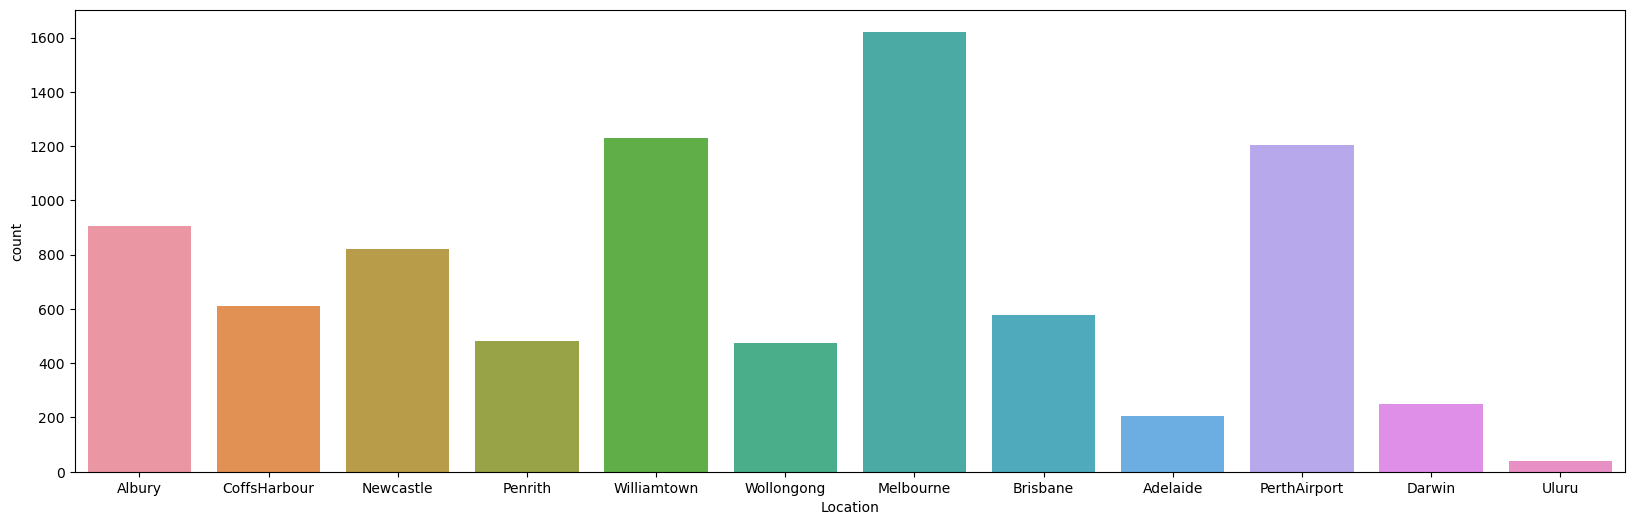

In [34]:
plt.figure(figsize=(20,6))
sns.countplot(df['Location'])
print(df['Location'].value_counts())

N      1704
SSE     578
S       577
SW      572
E       557
WNW     531
W       507
WSW     504
SE      484
ENE     415
SSW     396
NW      383
NE      353
NNE     343
ESE     302
NNW     219
Name: WindGustDir, dtype: int64


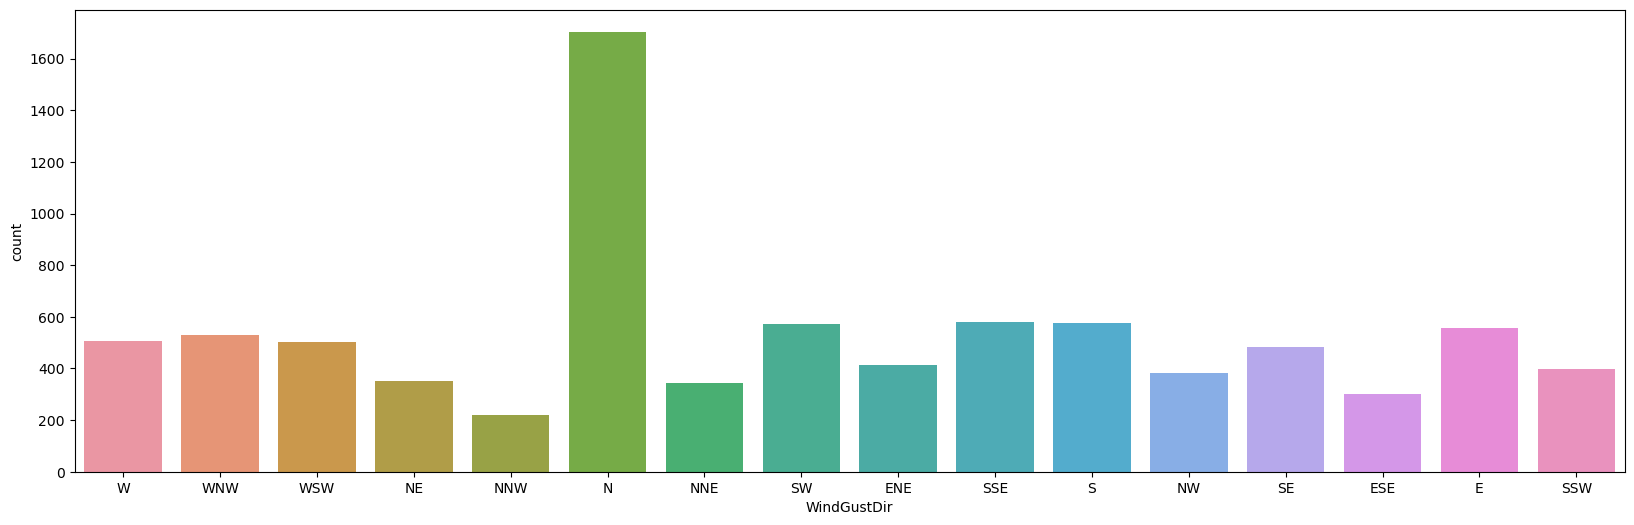

In [35]:
plt.figure(figsize=(20,6))
sns.countplot(df['WindGustDir'])
print(df['WindGustDir'].value_counts())

No     6435
Yes    1990
Name: RainToday, dtype: int64


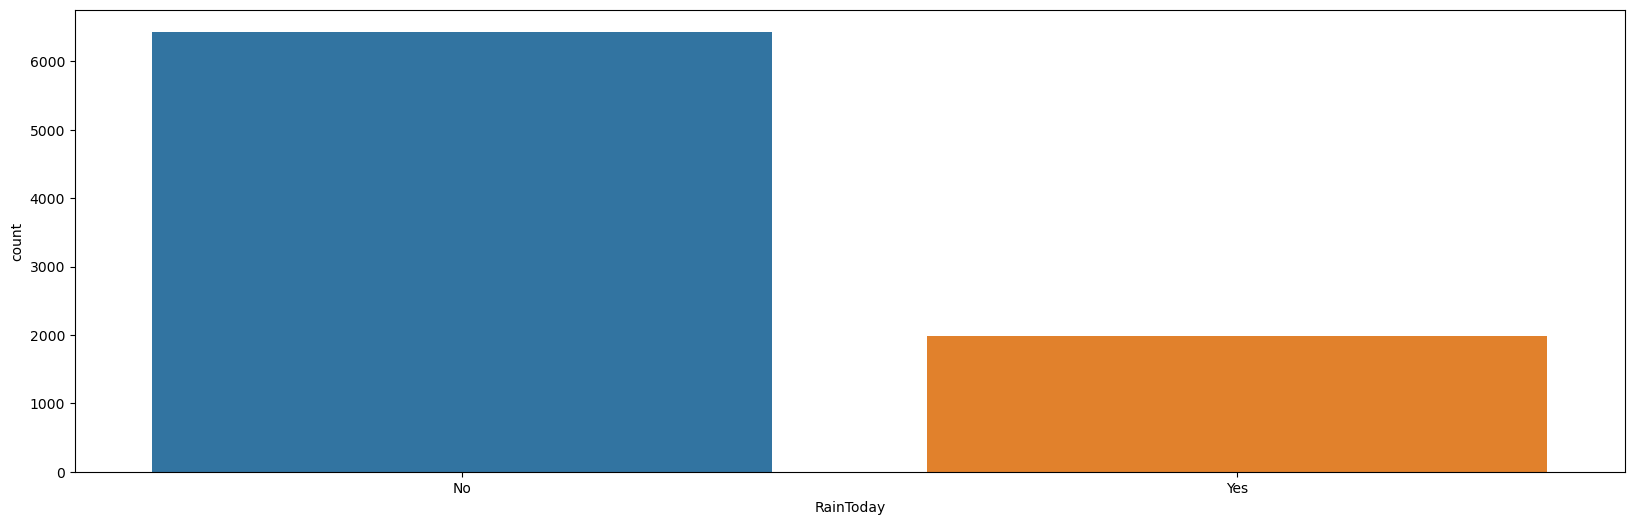

In [36]:
plt.figure(figsize=(20,6))
sns.countplot(df['RainToday'])
print(df['RainToday'].value_counts())

No     6434
Yes    1991
Name: RainTomorrow, dtype: int64


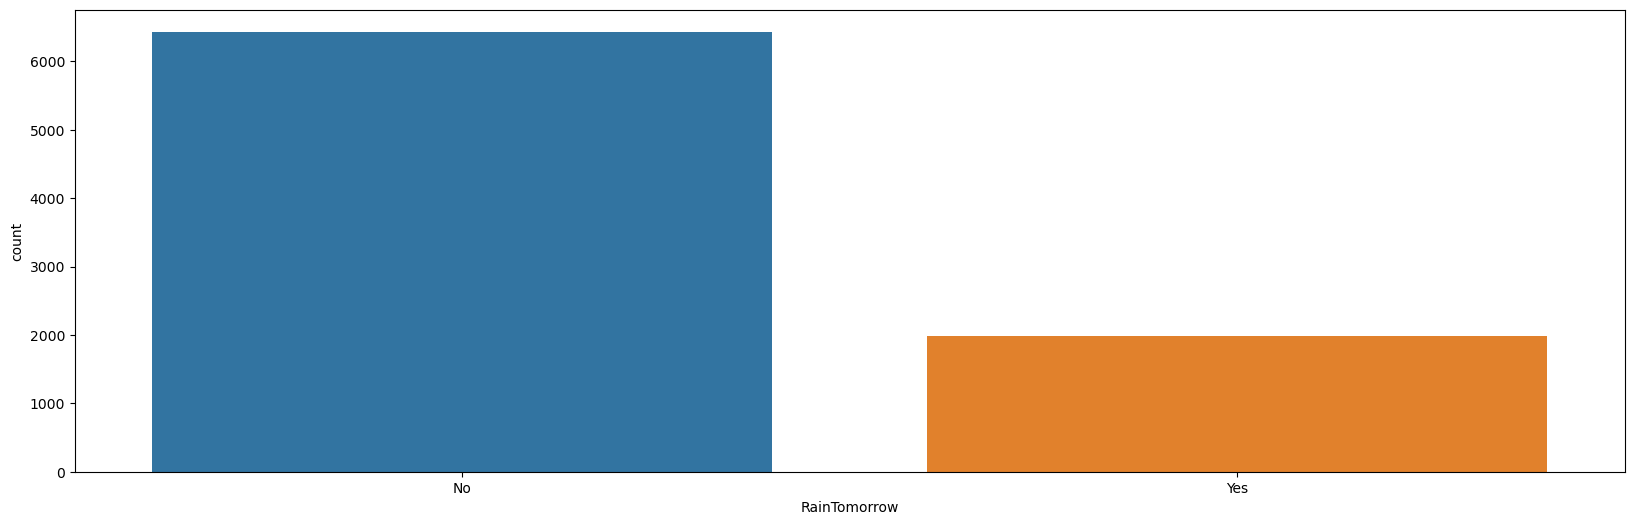

In [37]:
plt.figure(figsize=(20,6))
sns.countplot(df['RainTomorrow'])
print(df['RainTomorrow'].value_counts())

N      1735
SW      704
NW      625
WSW     543
SE      505
WNW     480
SSW     467
ENE     433
NNE     430
W       414
NE      409
S       402
E       380
SSE     365
NNW     280
ESE     253
Name: WindDir9am, dtype: int64


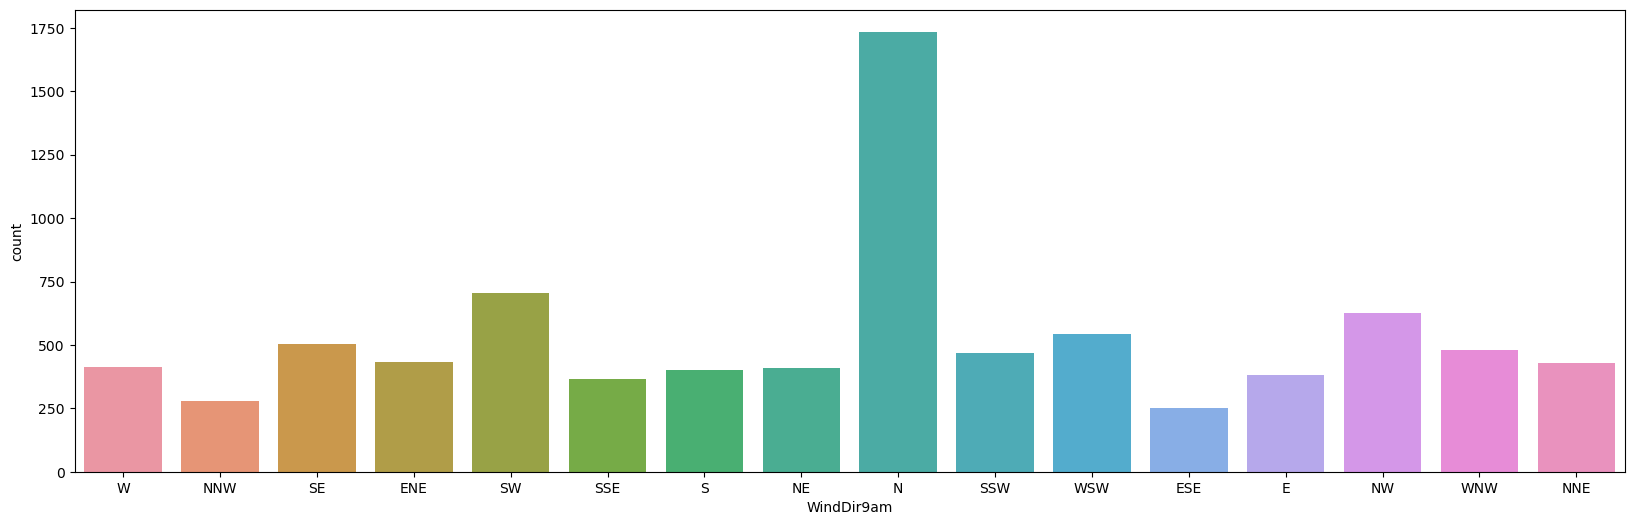

In [38]:
plt.figure(figsize=(20,6))
sns.countplot(df['WindDir9am'])
print(df['WindDir9am'].value_counts())

SE     1121
S       742
SSE     623
WSW     580
NE      544
N       524
SW      494
WNW     487
NW      468
W       462
ESE     462
E       460
ENE     417
SSW     370
NNE     365
NNW     306
Name: WindDir3pm, dtype: int64


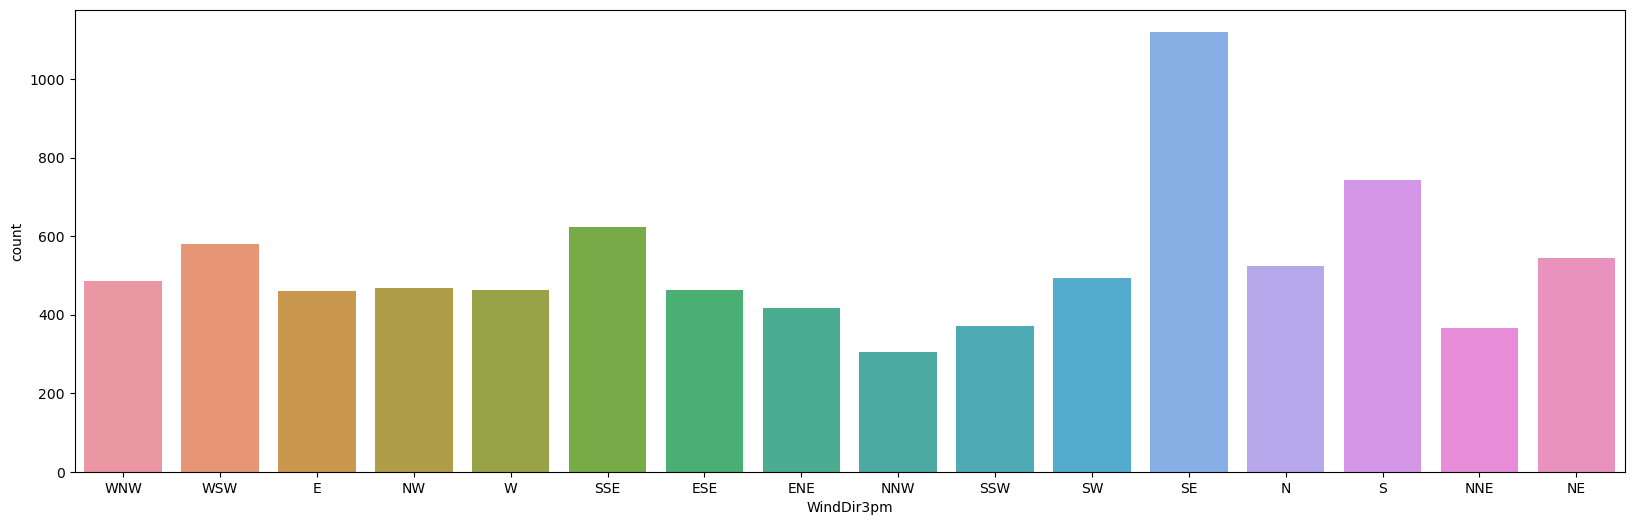

In [39]:
plt.figure(figsize=(20,6))
sns.countplot(df['WindDir3pm'])
print(df['WindDir3pm'].value_counts())

<AxesSubplot:xlabel='MinTemp', ylabel='Density'>

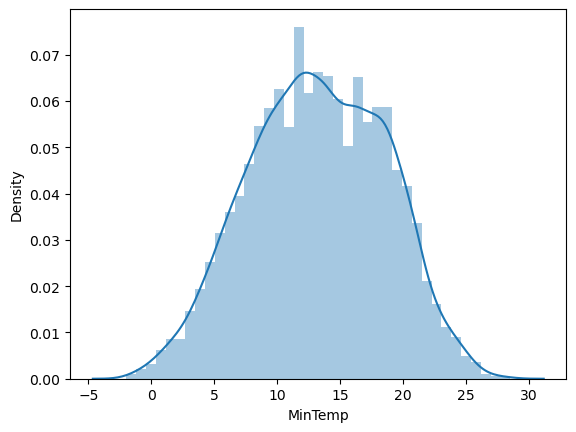

In [40]:
#Distribution of MinTemp
sns.distplot(df['MinTemp'])

Most of the Data is between 5 & 20

<AxesSubplot:xlabel='MaxTemp', ylabel='Density'>

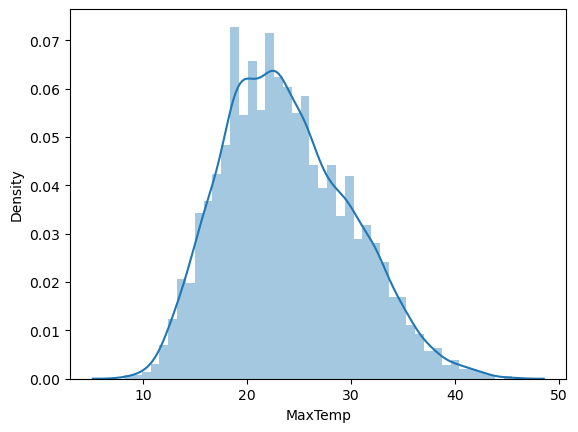

In [41]:
#Distribution of  MaxTemp
sns.distplot(df['MaxTemp'])

<AxesSubplot:xlabel='Rainfall', ylabel='Density'>

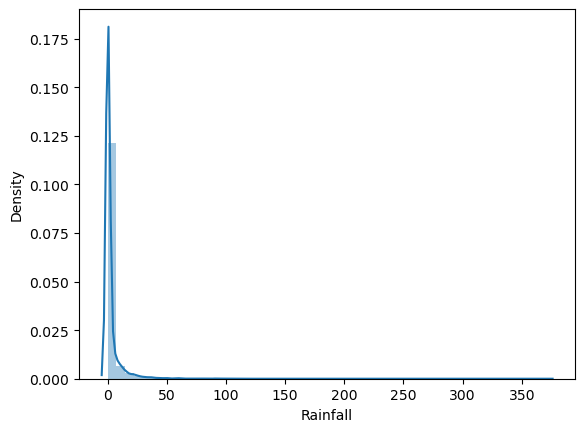

In [42]:
#Distribution of  Rainfall
sns.distplot(df['Rainfall'])

Most of the data is between 0mm and 25mm

<AxesSubplot:xlabel='Evaporation', ylabel='Density'>

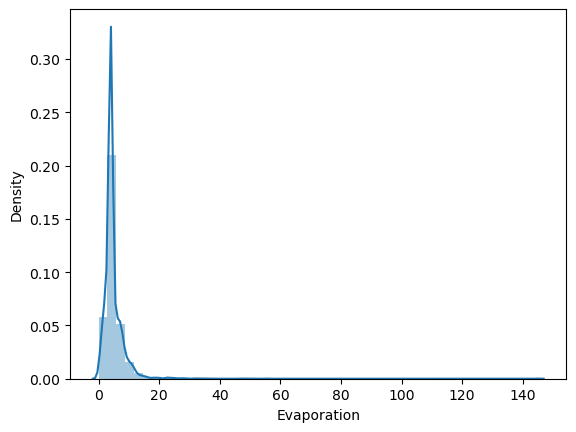

In [43]:
#Distribution of Evaporation
sns.distplot(df['Evaporation'])

Most of the data is between 0mm and 20mm

<AxesSubplot:xlabel='Sunshine', ylabel='Density'>

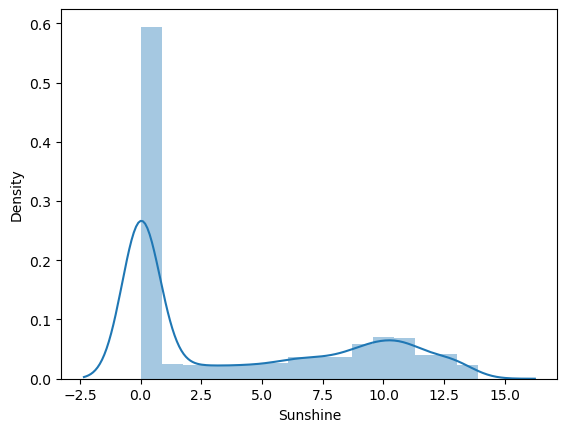

In [44]:
#Distribution of Sunshine
sns.distplot(df['Sunshine'])

<AxesSubplot:xlabel='WindGustSpeed', ylabel='Density'>

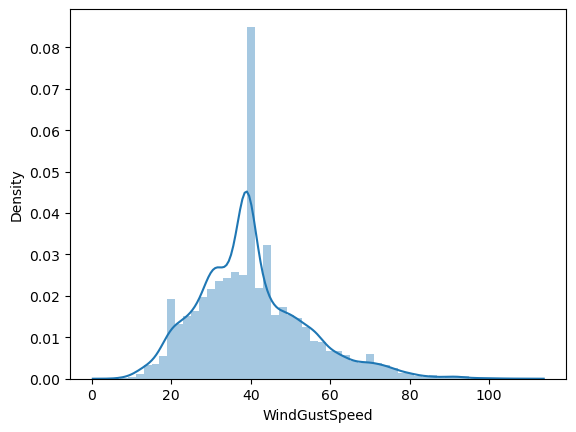

In [45]:
#Distribution of WindGustSpeed
sns.distplot(df['WindGustSpeed'])

<AxesSubplot:xlabel='WindSpeed9am', ylabel='Density'>

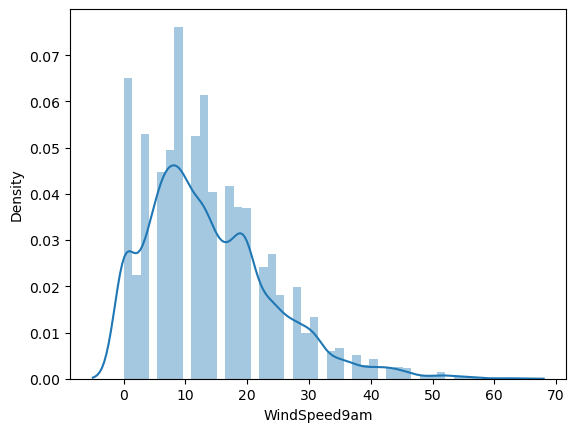

In [46]:
#Distribution of WindSpeed9am
sns.distplot(df['WindSpeed9am'])

<AxesSubplot:xlabel='WindSpeed3pm', ylabel='Density'>

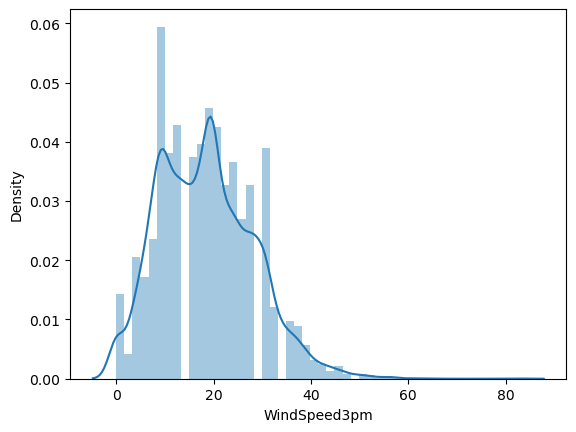

In [47]:
#Distribution of WindSpeed3pm
sns.distplot(df['WindSpeed3pm'])

<AxesSubplot:xlabel='Humidity9am', ylabel='Density'>

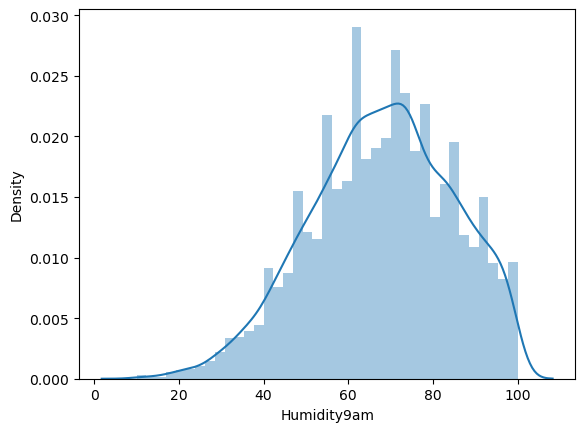

In [48]:
#Distribution of Humidity9am
sns.distplot(df['Humidity9am'])

<AxesSubplot:xlabel='Humidity3pm', ylabel='Density'>

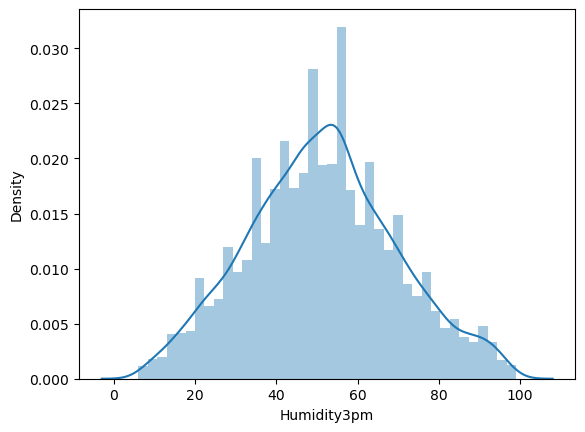

In [49]:
#Distribution of Humidity3pm
sns.distplot(df['Humidity3pm'])

<AxesSubplot:xlabel='Pressure9am', ylabel='Density'>

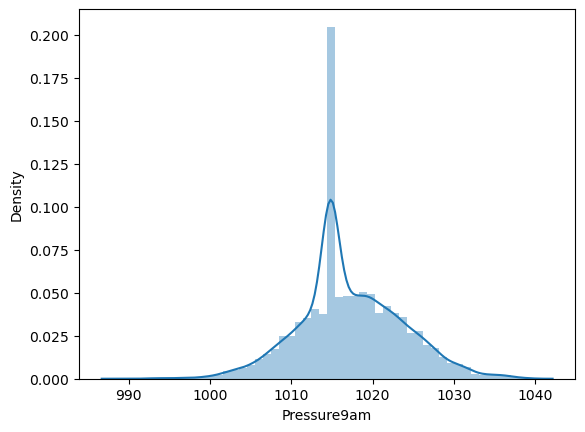

In [50]:
#Distribution of Pressure9am
sns.distplot(df['Pressure9am'])

<AxesSubplot:xlabel='Pressure3pm', ylabel='Density'>

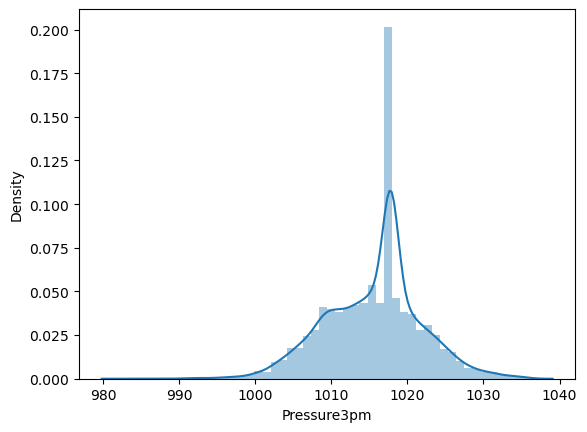

In [51]:
#Distribution of Pressure3pm
sns.distplot(df['Pressure3pm'])

<AxesSubplot:xlabel='Temp9am', ylabel='Density'>

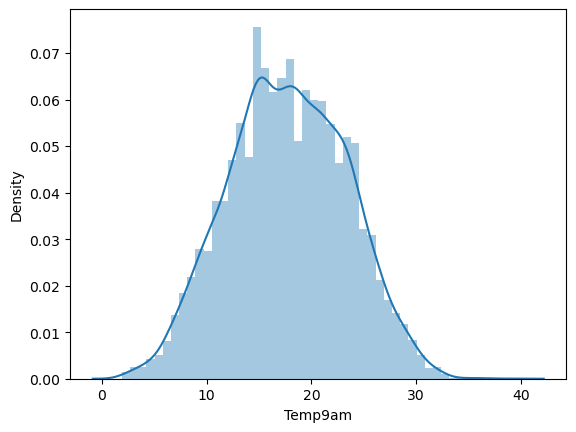

In [52]:
#Distribution of Temp9am
sns.distplot(df['Temp9am'])

<AxesSubplot:xlabel='Temp3pm', ylabel='Density'>

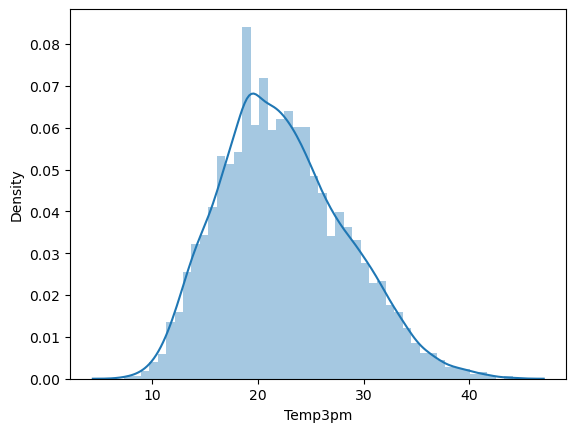

In [53]:
#Distribution of Temp3pm
sns.distplot(df['Temp3pm'])

# BI Variant Analysis

(array([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11]),
 [Text(0, 0, 'Melbourne'),
  Text(1, 0, 'Williamtown'),
  Text(2, 0, 'PerthAirport'),
  Text(3, 0, 'Albury'),
  Text(4, 0, 'Newcastle'),
  Text(5, 0, 'CoffsHarbour'),
  Text(6, 0, 'Brisbane'),
  Text(7, 0, 'Penrith'),
  Text(8, 0, 'Wollongong'),
  Text(9, 0, 'Darwin'),
  Text(10, 0, 'Adelaide'),
  Text(11, 0, 'Uluru')])

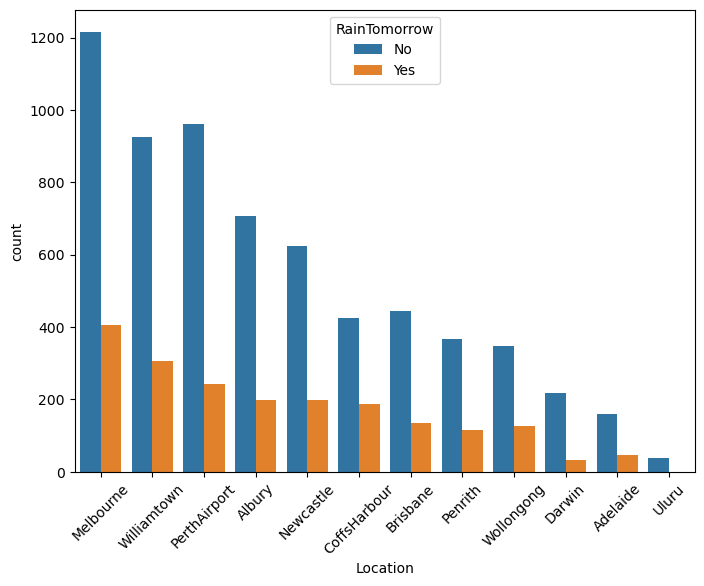

In [54]:
plt.figure(figsize=(8,6))
sns.countplot(df['Location'],order=df['Location'].value_counts().index,hue=df['RainTomorrow'])
plt.xticks(rotation=45)

<AxesSubplot:xlabel='Location'>

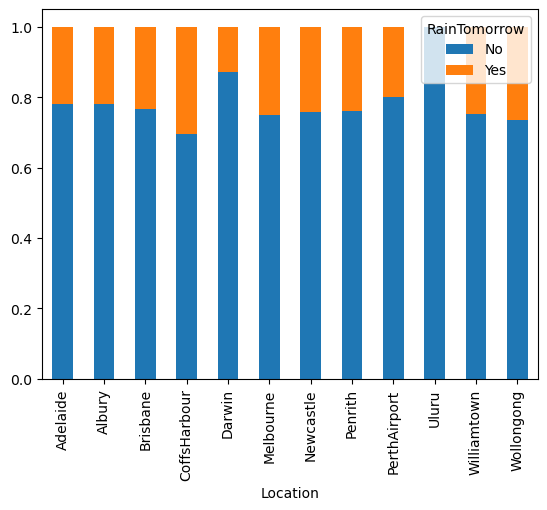

In [55]:
table=pd.crosstab(df['Location'],df['RainTomorrow'])
table.div(table.sum(1),axis=0).plot(kind='bar',stacked=True)

<AxesSubplot:xlabel='MinTemp', ylabel='MaxTemp'>

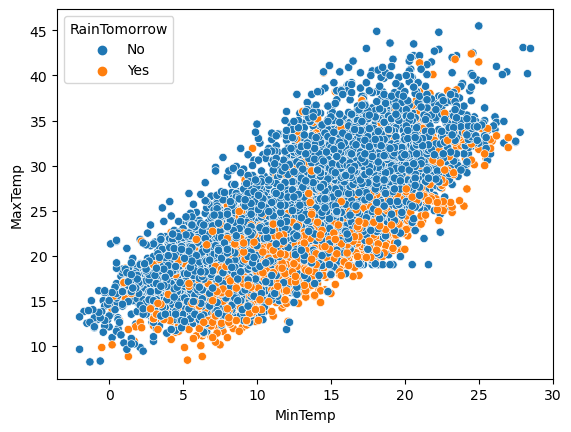

In [56]:
sns.scatterplot(df['MinTemp'],df['MaxTemp'],hue='RainTomorrow',data=df)

<AxesSubplot:xlabel='MinTemp', ylabel='Rainfall'>

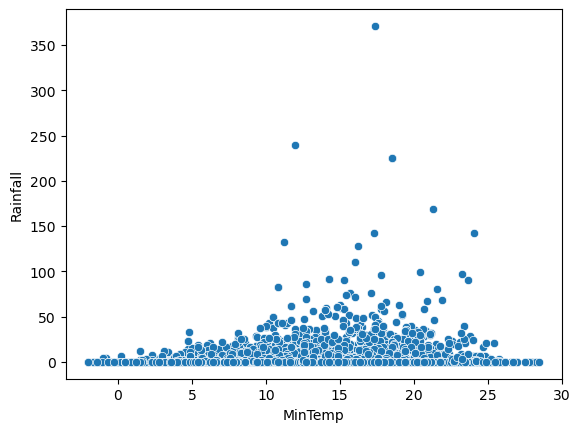

In [57]:
sns.scatterplot(df['MinTemp'],df['Rainfall'],data=df)

<AxesSubplot:xlabel='MaxTemp', ylabel='Rainfall'>

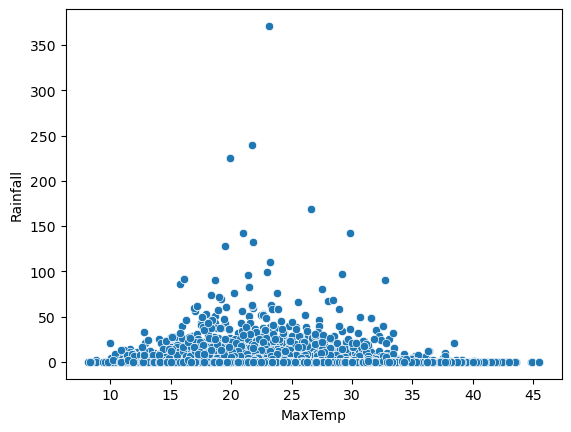

In [58]:
sns.scatterplot(df['MaxTemp'],df['Rainfall'],data=df)

<AxesSubplot:xlabel='Evaporation', ylabel='Rainfall'>

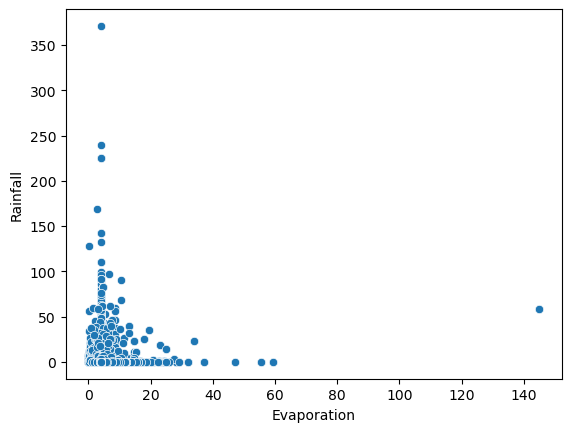

In [59]:
sns.scatterplot(df['Evaporation'],df['Rainfall'],data=df)

<AxesSubplot:xlabel='Evaporation', ylabel='RainTomorrow'>

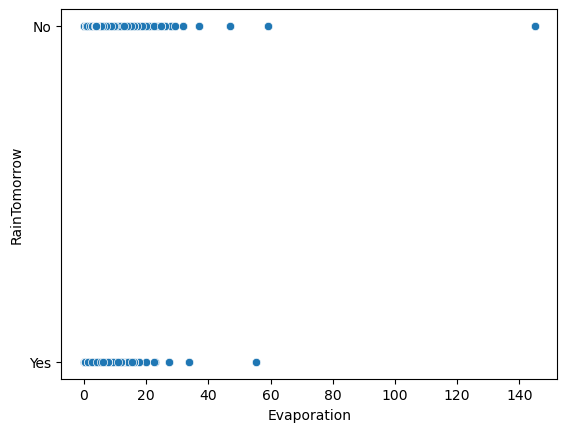

In [60]:
sns.scatterplot(df['Evaporation'],df['RainTomorrow'],data=df)

<AxesSubplot:xlabel='Sunshine', ylabel='RainTomorrow'>

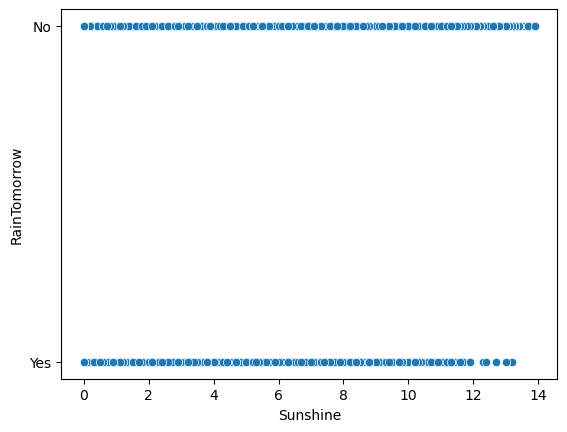

In [61]:
sns.scatterplot(df['Sunshine'],df['RainTomorrow'],data=df)

<AxesSubplot:xlabel='Evaporation', ylabel='Rainfall'>

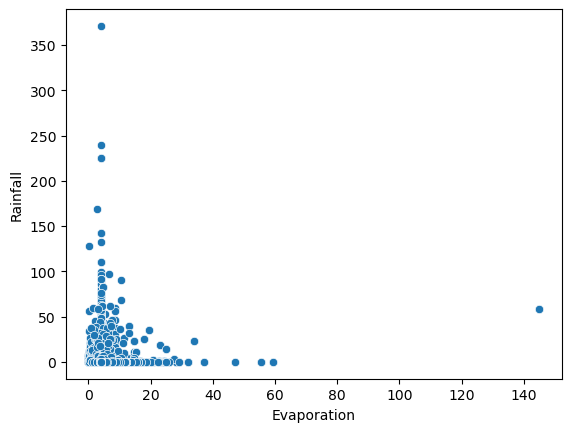

In [62]:
sns.scatterplot(df['Evaporation'],df['Rainfall'],data=df)

<AxesSubplot:xlabel='Sunshine', ylabel='Rainfall'>

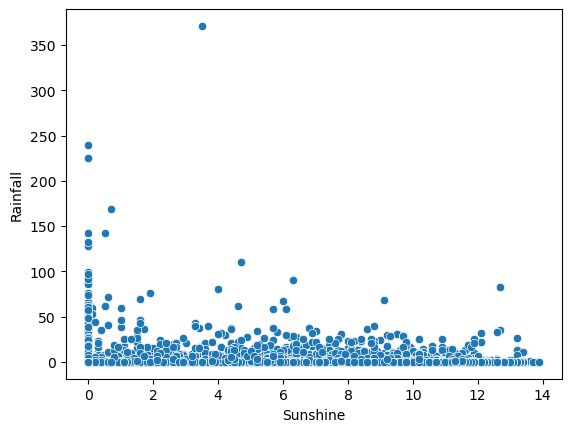

In [63]:
sns.scatterplot(df['Sunshine'],df['Rainfall'],data=df)

<AxesSubplot:xlabel='WindGustDir', ylabel='WindGustSpeed'>

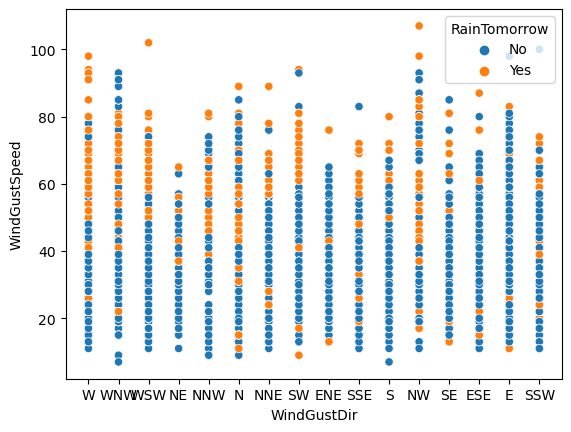

In [64]:
sns.scatterplot(df['WindGustDir'],df['WindGustSpeed'],hue='RainTomorrow',data=df)

<AxesSubplot:xlabel='WindGustDir', ylabel='Rainfall'>

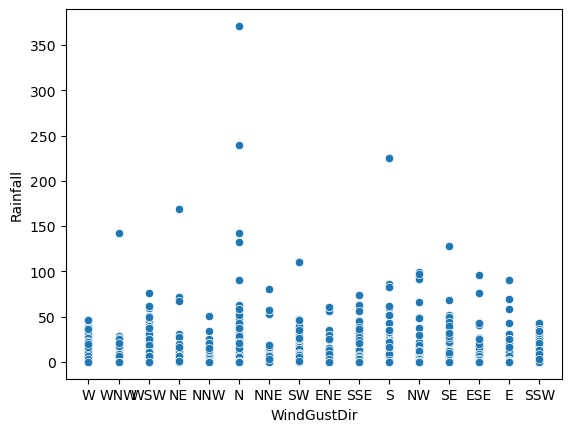

In [65]:
sns.scatterplot(df['WindGustDir'],df['Rainfall'],data=df)

<AxesSubplot:xlabel='WindGustSpeed', ylabel='Rainfall'>

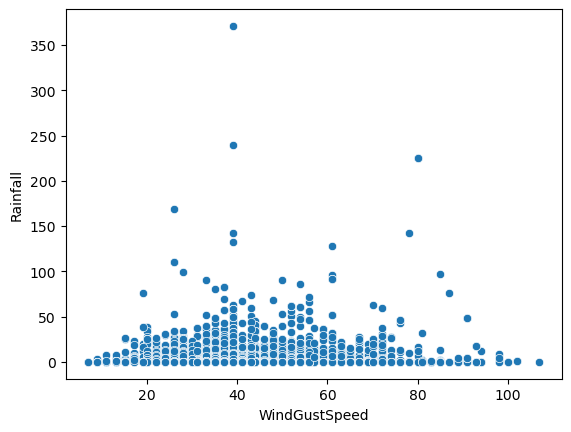

In [66]:
sns.scatterplot(df['WindGustSpeed'],df['Rainfall'],data=df)

<AxesSubplot:xlabel='WindDir9am', ylabel='WindDir3pm'>

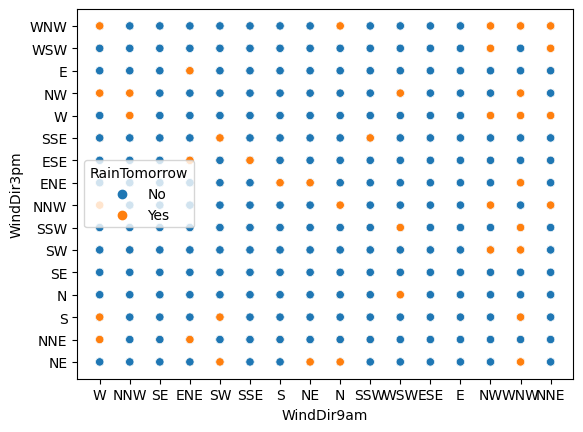

In [67]:
sns.scatterplot(df['WindDir9am'],df['WindDir3pm'],hue='RainTomorrow',data=df)

<AxesSubplot:xlabel='WindDir9am', ylabel='Rainfall'>

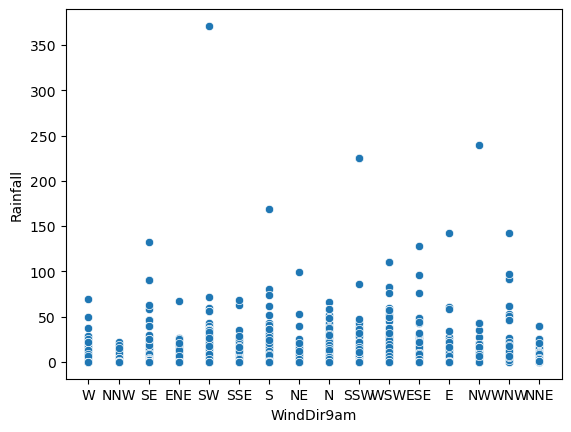

In [68]:
sns.scatterplot(df['WindDir9am'],df['Rainfall'],data=df)

<AxesSubplot:xlabel='WindDir3pm', ylabel='Rainfall'>

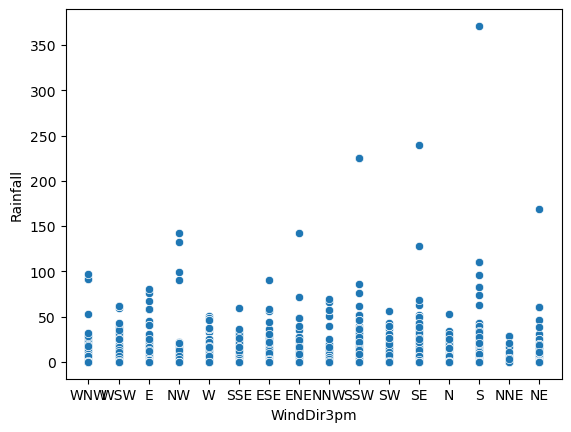

In [69]:
sns.scatterplot(df['WindDir3pm'],df['Rainfall'],data=df)

<AxesSubplot:xlabel='WindSpeed9am', ylabel='WindSpeed3pm'>

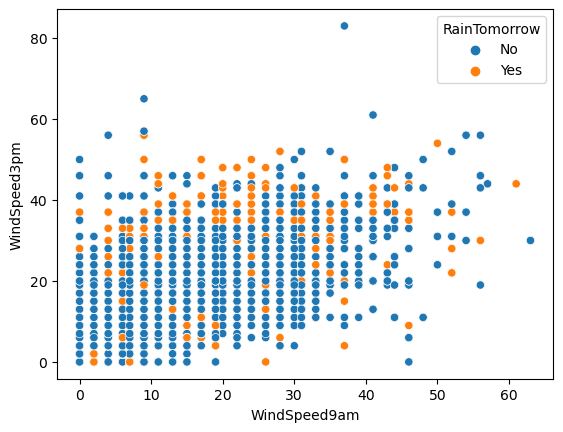

In [70]:
sns.scatterplot(df['WindSpeed9am'],df['WindSpeed3pm'],hue='RainTomorrow',data=df)

<AxesSubplot:xlabel='WindSpeed9am', ylabel='Rainfall'>

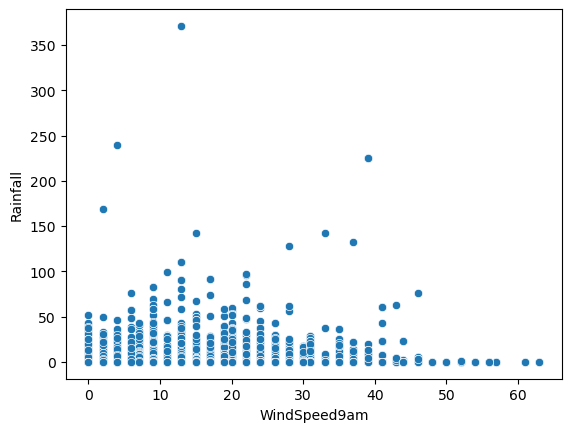

In [71]:
sns.scatterplot(df['WindSpeed9am'],df['Rainfall'],data=df)

<AxesSubplot:xlabel='WindSpeed3pm', ylabel='Rainfall'>

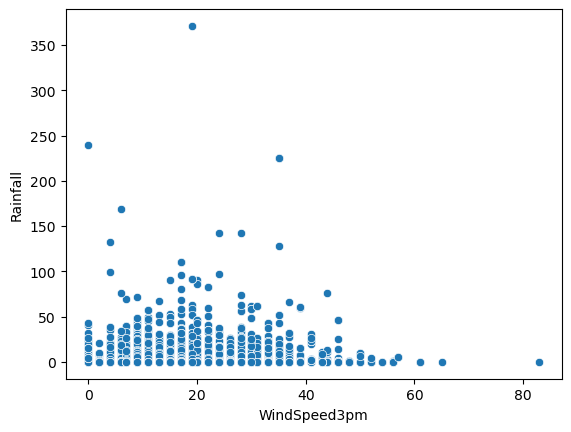

In [72]:
sns.scatterplot(df['WindSpeed3pm'],df['Rainfall'],data=df)

<AxesSubplot:xlabel='Humidity9am', ylabel='Humidity3pm'>

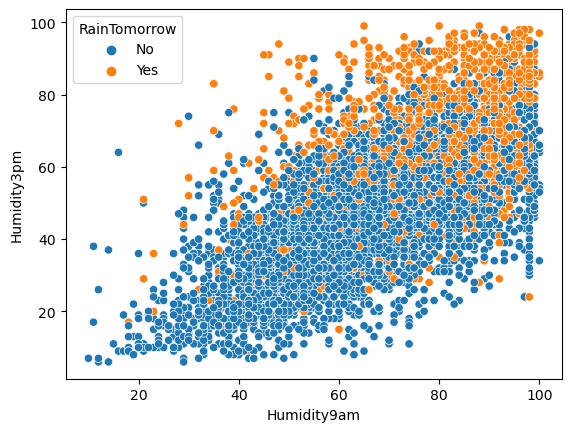

In [73]:
sns.scatterplot(df['Humidity9am'],df['Humidity3pm'],hue='RainTomorrow',data=df)

<AxesSubplot:xlabel='Humidity9am', ylabel='Rainfall'>

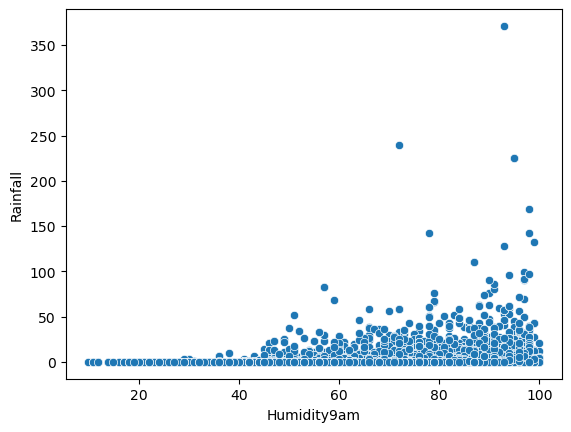

In [74]:
sns.scatterplot(df['Humidity9am'],df['Rainfall'],data=df)

<AxesSubplot:xlabel='Humidity3pm', ylabel='Rainfall'>

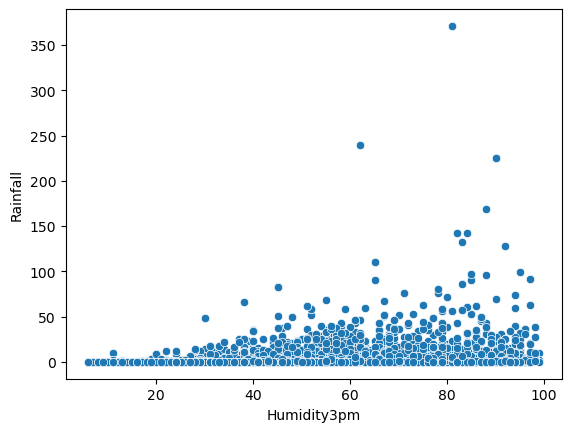

In [75]:
sns.scatterplot(df['Humidity3pm'],df['Rainfall'],data=df)

<AxesSubplot:xlabel='Pressure9am', ylabel='Pressure3pm'>

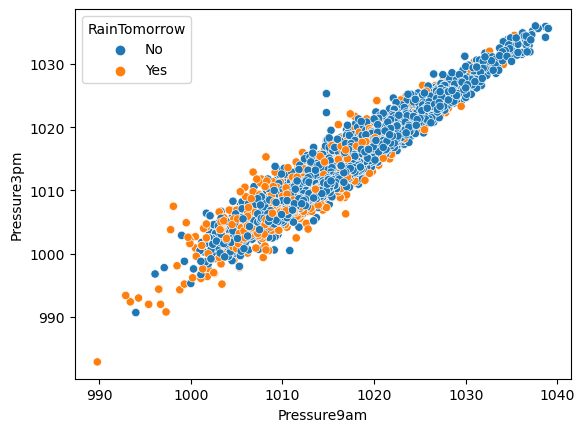

In [76]:
sns.scatterplot(df['Pressure9am'],df['Pressure3pm'],hue='RainTomorrow',data=df)

<AxesSubplot:xlabel='Pressure9am', ylabel='Rainfall'>

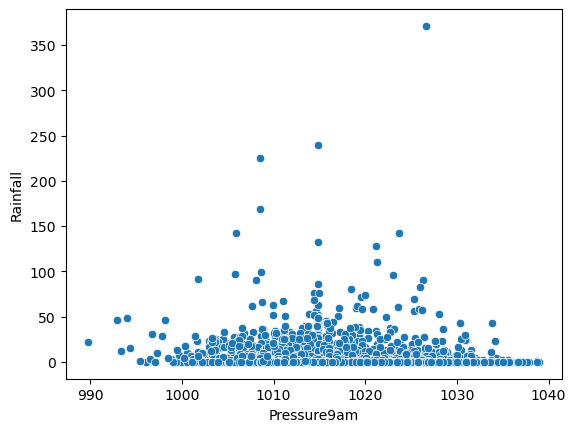

In [77]:
sns.scatterplot(df['Pressure9am'],df['Rainfall'],data=df)

<AxesSubplot:xlabel='Pressure3pm', ylabel='Rainfall'>

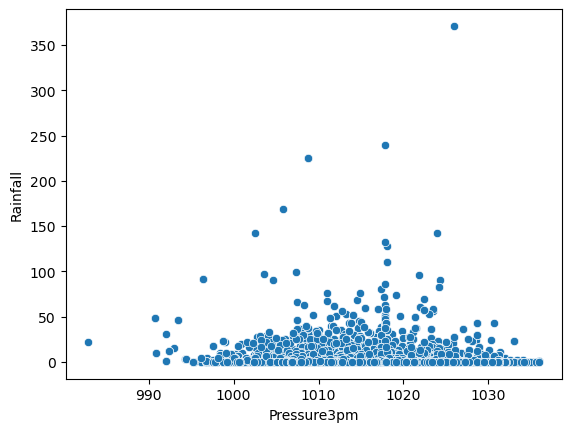

In [78]:
sns.scatterplot(df['Pressure3pm'],df['Rainfall'],data=df)

<AxesSubplot:xlabel='Cloud9am', ylabel='Cloud3pm'>

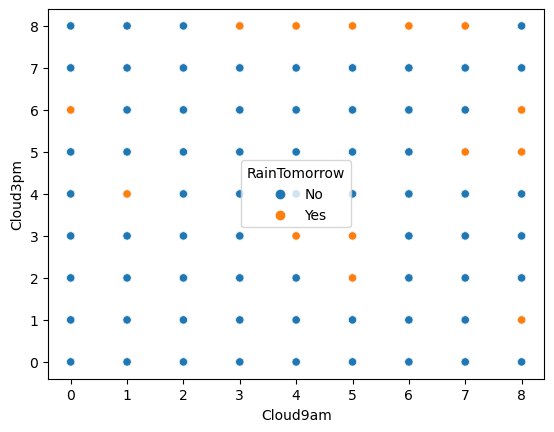

In [79]:
sns.scatterplot(df['Cloud9am'],df['Cloud3pm'],hue='RainTomorrow',data=df)

<AxesSubplot:xlabel='Cloud9am', ylabel='Rainfall'>

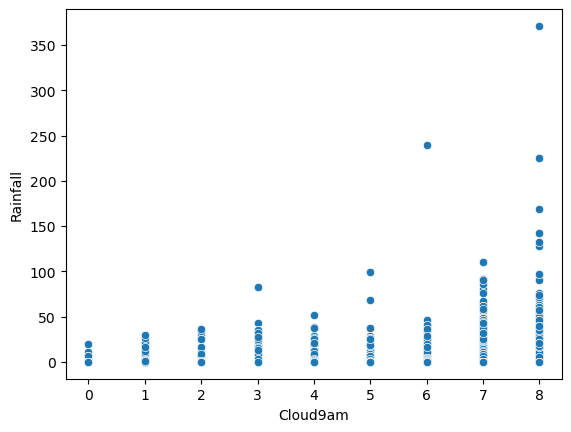

In [80]:
sns.scatterplot(df['Cloud9am'],df['Rainfall'],data=df)

<AxesSubplot:xlabel='Cloud3pm', ylabel='Rainfall'>

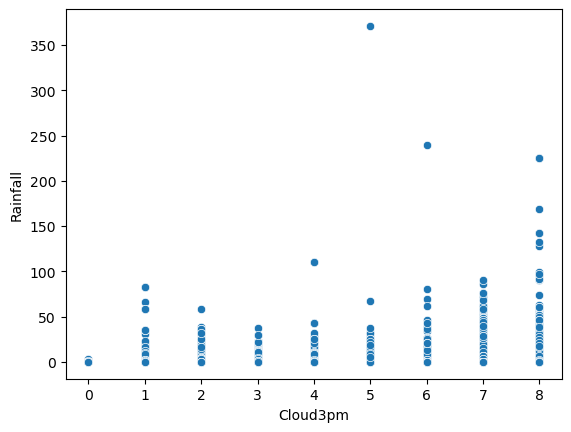

In [81]:
sns.scatterplot(df['Cloud3pm'],df['Rainfall'],data=df)

<AxesSubplot:xlabel='Temp9am', ylabel='Temp3pm'>

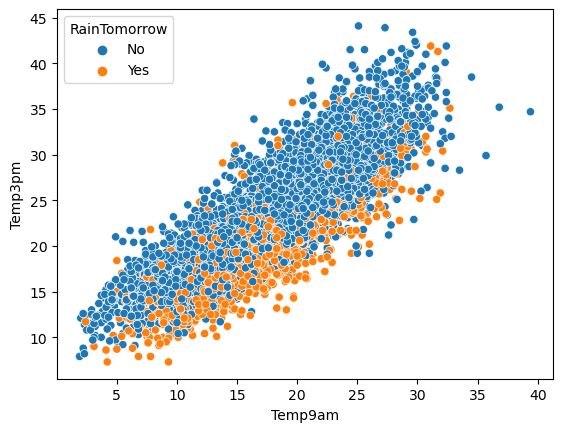

In [82]:
sns.scatterplot(df['Temp9am'],df['Temp3pm'],hue='RainTomorrow',data=df)

<AxesSubplot:xlabel='Temp9am', ylabel='Rainfall'>

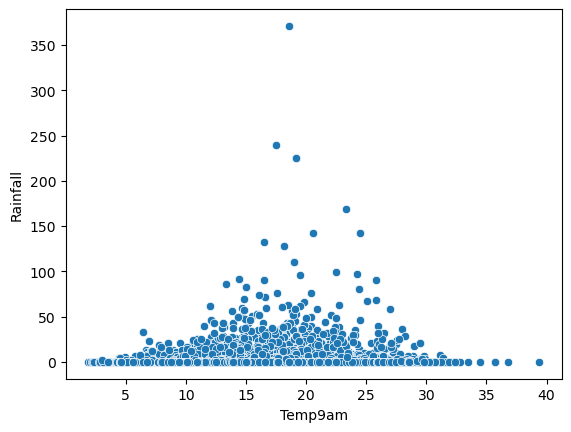

In [83]:
sns.scatterplot(df['Temp9am'],df['Rainfall'],data=df)

<AxesSubplot:xlabel='Temp3pm', ylabel='Rainfall'>

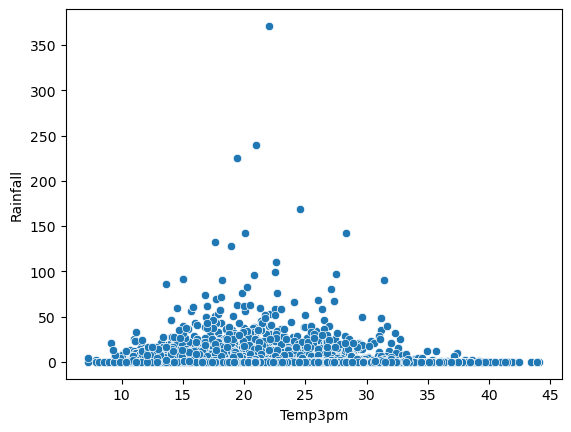

In [84]:
sns.scatterplot(df['Temp3pm'],df['Rainfall'],data=df)

<AxesSubplot:xlabel='Humidity3pm', ylabel='Humidity9am'>

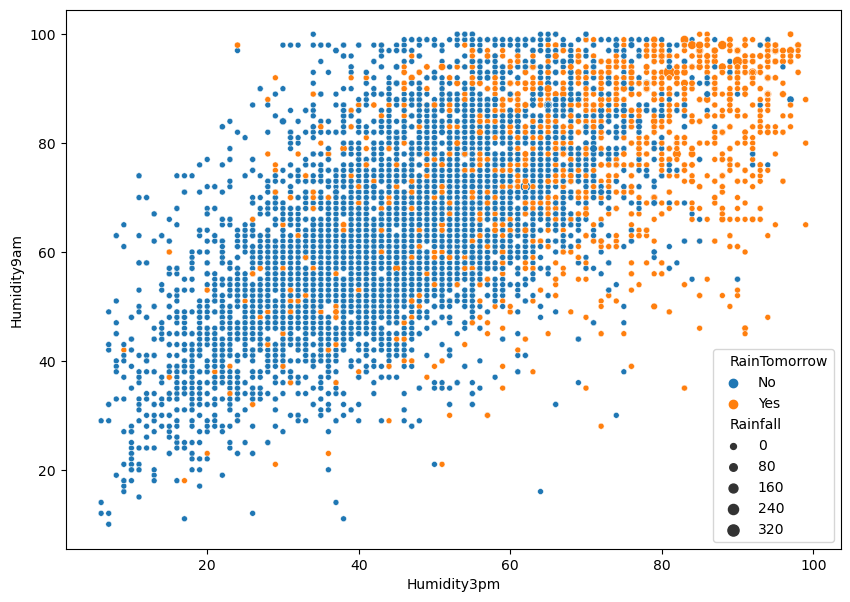

In [85]:
plt.figure(figsize=(10,7))
sns.scatterplot(df['Humidity3pm'],df['Humidity9am'],hue='RainTomorrow',size='Rainfall',data=df)

<AxesSubplot:xlabel='Humidity3pm', ylabel='Humidity9am'>

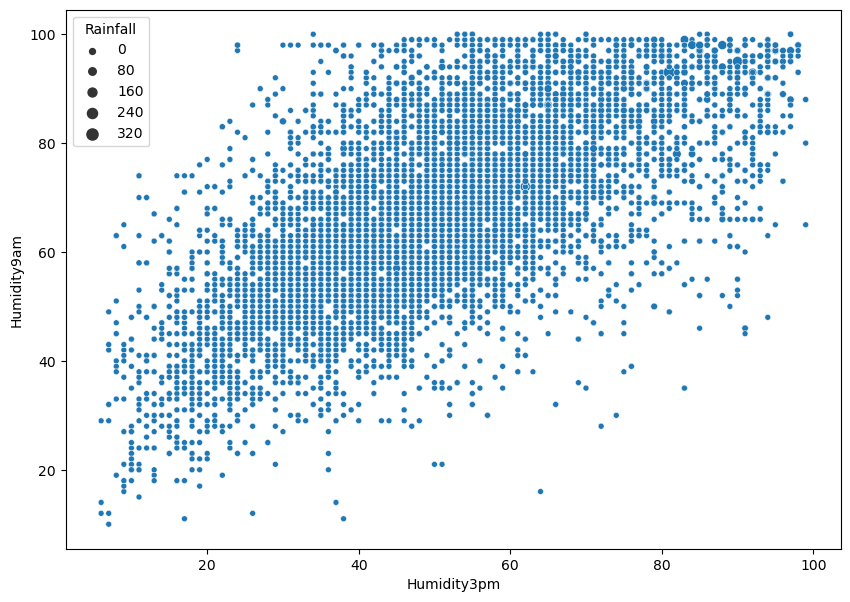

In [86]:
plt.figure(figsize=(10,7))
sns.scatterplot(df['Humidity3pm'],df['Humidity9am'],size='Rainfall',data=df)

In [87]:
df.groupby('RainToday')['RainTomorrow'].value_counts()

RainToday  RainTomorrow
No         No              5390
           Yes             1045
Yes        No              1044
           Yes              946
Name: RainTomorrow, dtype: int64

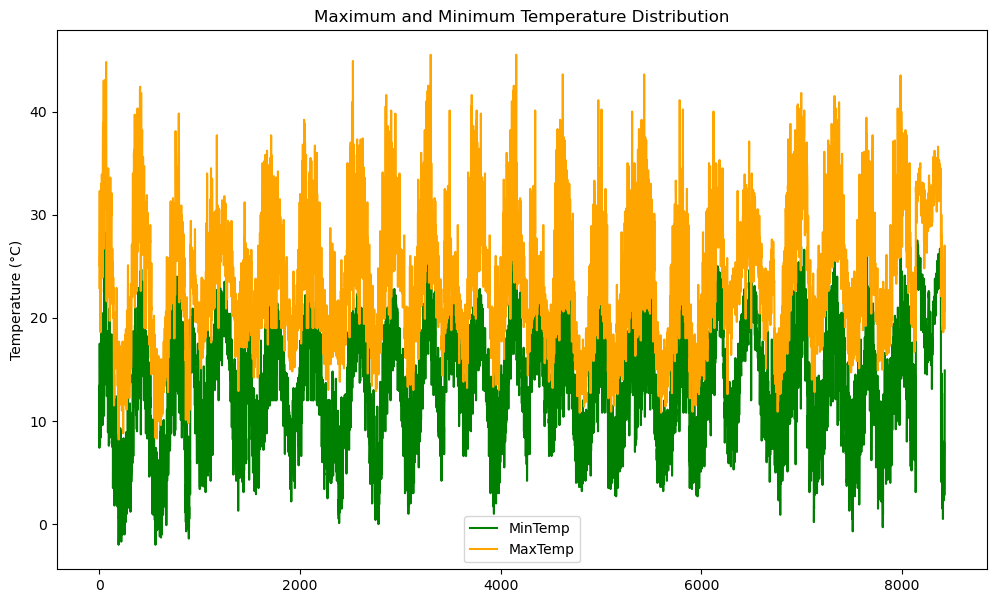

In [88]:
df["MinTemp"].plot(figsize=(12,7), color='g', legend=True)
df['MaxTemp'].plot(figsize=(12,7), color='orange', legend=True)
plt.title('Maximum and Minimum Temperature Distribution')
plt.ylabel('Temperature (°C)')
plt.show()

# Outliers Handling

In [89]:
df[num_col]

MinTemp  MaxTemp  Rainfall  Evaporation  Sunshine  WindGustSpeed  \
0        13.4     22.9       0.6          4.0       0.0           44.0   
1         7.4     25.1       0.0          4.0       0.0           44.0   
2        12.9     25.7       0.0          4.0       0.0           46.0   
3         9.2     28.0       0.0          4.0       0.0           24.0   
4        17.5     32.3       1.0          4.0       0.0           41.0   
...       ...      ...       ...          ...       ...            ...   
8420      2.8     23.4       0.0          4.0       0.0           31.0   
8421      3.6     25.3       0.0          4.0       0.0           22.0   
8422      5.4     26.9       0.0          4.0       0.0           37.0   
8423      7.8     27.0       0.0          4.0       0.0           28.0   
8424     14.9     19.0       0.0          4.0       0.0           39.0   

      WindSpeed9am  WindSpeed3pm  Humidity9am  Humidity3pm  Pressure9am  \
0             20.0          24.0         71.0         22.0       1007.7   
1              4.0          22.0         44.0         25.0       1010.6   
2             19.0          26.0         38.0         30.0       1007.6   
3             11.0           9.0         45.0         16.0       1017.6   
4              7.0          20.0         82.0         33.0       1010.8   
...            ...           ...          ...          ...          ...   
8420          13.0          11.0         51.0         24.0       1024.6   
8421          13.0           9.0         56.0         21.0       1023.5   
8422           9.0           9.0         53.0         24.0       1021.0   
8423          13.0           7.0         51.0         24.0       1019.4   
8424          17.0          17.0         62.0         36.0       1020.2   

      Pressure3pm  Cloud9am  Cloud3pm  Temp9am  Temp3pm  
0          1007.1       8.0       7.0     16.9     21.8  
1          1007.8       7.0       7.0     17.2     24.3  
2          1008.7       7.0       2.0     21.0     23.2  
3          1012.8       7.0       7.0     18.1     26.5  
4          1006.0       7.0       8.0     17.8     29.7  
...           ...       ...       ...      ...      ...  
8420       1020.3       7.0       7.0     10.1     22.4  
8421       1019.1       7.0       7.0     10.9     24.5  
8422       1016.8       7.0       7.0     12.5     26.1  
8423       1016.5       3.0       2.0     15.1     26.0  
8424       1017.9       8.0       8.0     15.0     20.9  

[8425 rows x 16 columns]

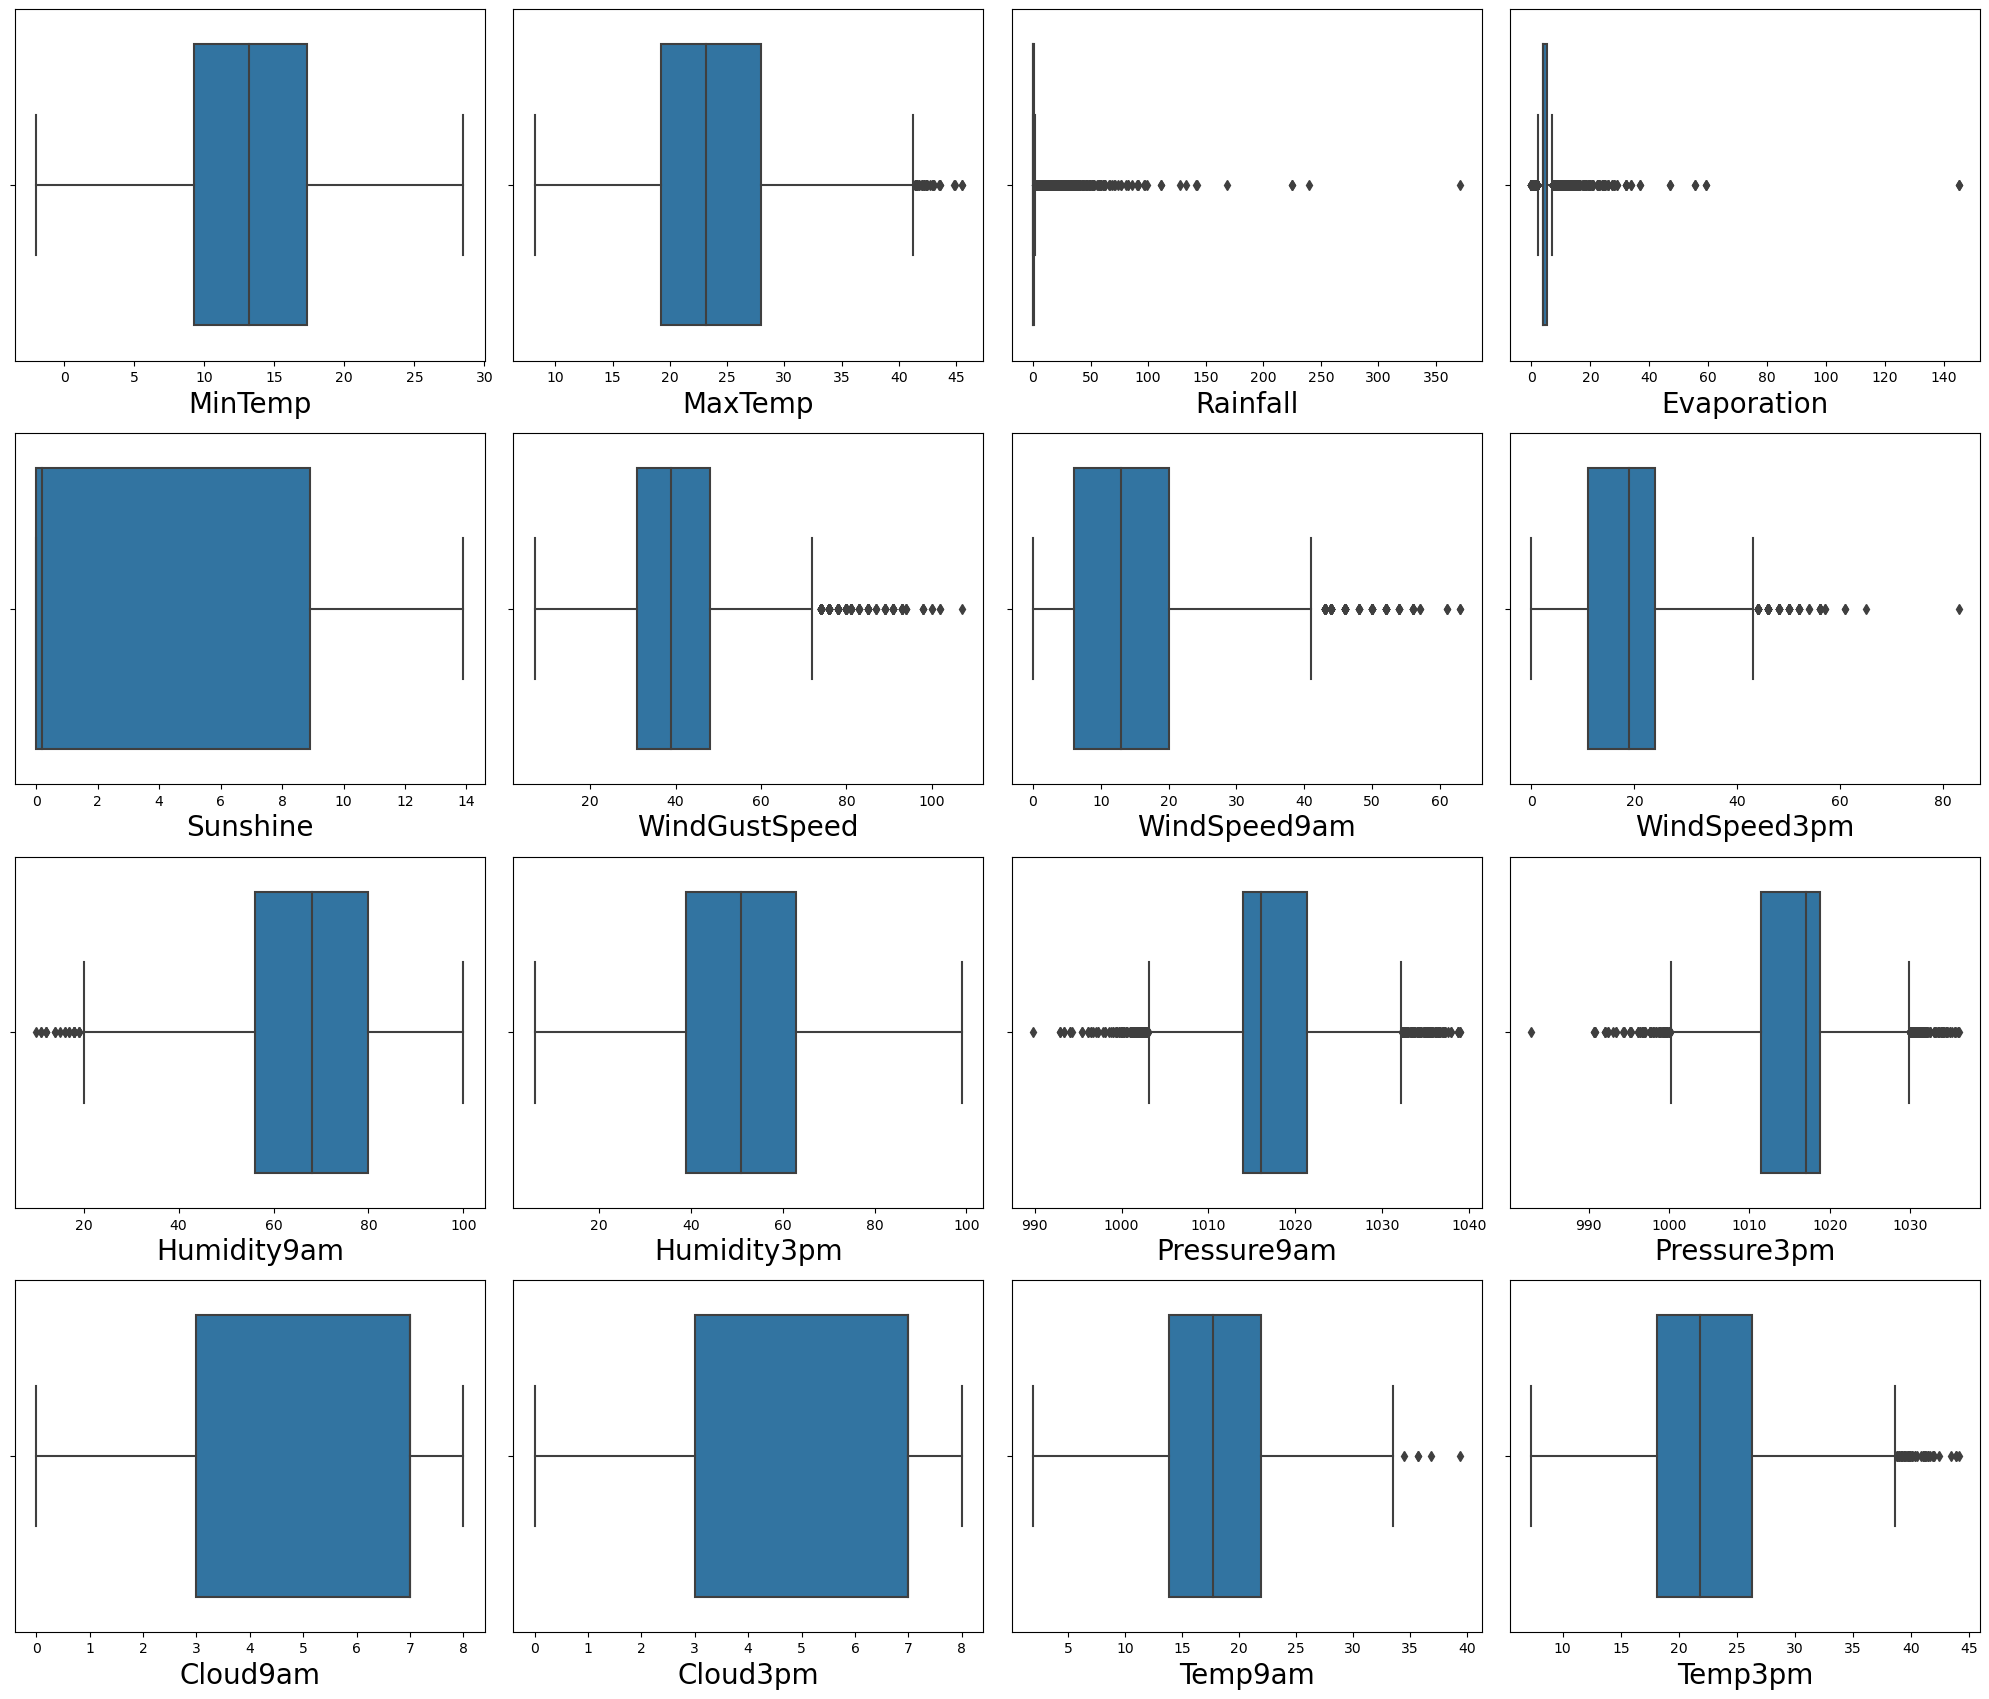

In [90]:
# Identifying the outliers using boxplot

plt.figure(figsize=(20,25))
plotnumber=1
for i in num_col:
    if plotnumber<=24:
        ax=plt.subplot(6,4,plotnumber)
        sns.boxplot(df[i])
        plt.xlabel(i,fontsize=20)
    plotnumber+=1
plt.tight_layout()

# ZScore Method

In [91]:
from scipy.stats import zscore

z=np.abs(zscore(df[num_col]))

dfn = df[(z<3).all(axis=1)]

dfn

Location  MinTemp  MaxTemp  Rainfall  Evaporation  Sunshine WindGustDir  \
0      Albury     13.4     22.9       0.6          4.0       0.0           W   
1      Albury      7.4     25.1       0.0          4.0       0.0         WNW   
2      Albury     12.9     25.7       0.0          4.0       0.0         WSW   
3      Albury      9.2     28.0       0.0          4.0       0.0          NE   
4      Albury     17.5     32.3       1.0          4.0       0.0           W   
...       ...      ...      ...       ...          ...       ...         ...   
8420    Uluru      2.8     23.4       0.0          4.0       0.0           E   
8421    Uluru      3.6     25.3       0.0          4.0       0.0         NNW   
8422    Uluru      5.4     26.9       0.0          4.0       0.0           N   
8423    Uluru      7.8     27.0       0.0          4.0       0.0          SE   
8424    Uluru     14.9     19.0       0.0          4.0       0.0           N   

      WindGustSpeed WindDir9am WindDir3pm  ...  Pressure3pm  Cloud9am  \
0              44.0          W        WNW  ...       1007.1       8.0   
1              44.0        NNW        WSW  ...       1007.8       7.0   
2              46.0          W        WSW  ...       1008.7       7.0   
3              24.0         SE          E  ...       1012.8       7.0   
4              41.0        ENE         NW  ...       1006.0       7.0   
...             ...        ...        ...  ...          ...       ...   
8420           31.0         SE        ENE  ...       1020.3       7.0   
8421           22.0         SE          N  ...       1019.1       7.0   
8422           37.0         SE        WNW  ...       1016.8       7.0   
8423           28.0        SSE          N  ...       1016.5       3.0   
8424           39.0        ESE        ESE  ...       1017.9       8.0   

      Cloud3pm  Temp9am  Temp3pm  RainToday  RainTomorrow  Year  Month  Day  
0          7.0     16.9     21.8         No            No  2008     12    1  
1          7.0     17.2     24.3         No            No  2008     12    2  
2          2.0     21.0     23.2         No            No  2008     12    3  
3          7.0     18.1     26.5         No            No  2008     12    4  
4          8.0     17.8     29.7         No            No  2008     12    5  
...        ...      ...      ...        ...           ...   ...    ...  ...  
8420       7.0     10.1     22.4         No            No  2017      6   21  
8421       7.0     10.9     24.5         No            No  2017      6   22  
8422       7.0     12.5     26.1         No            No  2017      6   23  
8423       2.0     15.1     26.0         No            No  2017      6   24  
8424       8.0     15.0     20.9         No            No  2017      6   25  

[7986 rows x 25 columns]

In [92]:
df.shape,dfn.shape

((8425, 25), (7986, 25))

In [93]:
print("Old DataFrame data in Rows and Column:",df.shape)
print("New DataFrame data in Rows and Column:",dfn.shape)
print("Total Dropped rows:",df.shape[0]-dfn.shape[0])
loss_percent=(df.shape[0]-dfn.shape[0])/df.shape[0]*100
print(loss_percent,"%")

Old DataFrame data in Rows and Column: (8425, 25)
New DataFrame data in Rows and Column: (7986, 25)
Total Dropped rows: 439
5.210682492581602 %


Here we lost 5.21% data in Zscore method

# IQR Method

In [94]:
#1st quantile
Q1=df[num_col].quantile(0.25)

# 3rd quantile
Q3=df[num_col].quantile(0.75)

#IQR
IQR=Q3 - Q1
dfs=df[~((df < (Q1 - 1.5 * IQR)) |(df> (Q3 + 1.5 * IQR))).any(axis=1)]

In [95]:
dfs.shape

(4789, 25)

In [96]:
print("Old DataFrame data in Rows and Column:",df.shape)
print("New DataFrame data in IQR Rows and Column:",dfs.shape)
print("Total Dropped rows IN IQR method:",df.shape[0]-dfs.shape[0])
loss_percent=(df.shape[0]-dfs.shape[0])/df.shape[0]*100
print(loss_percent,"%")

Old DataFrame data in Rows and Column: (8425, 25)
New DataFrame data in IQR Rows and Column: (4789, 25)
Total Dropped rows IN IQR method: 3636
43.15727002967359 %


43% data lost in IQR Method, So we will continue with Z Score Method, Where data loss is only 5.21%

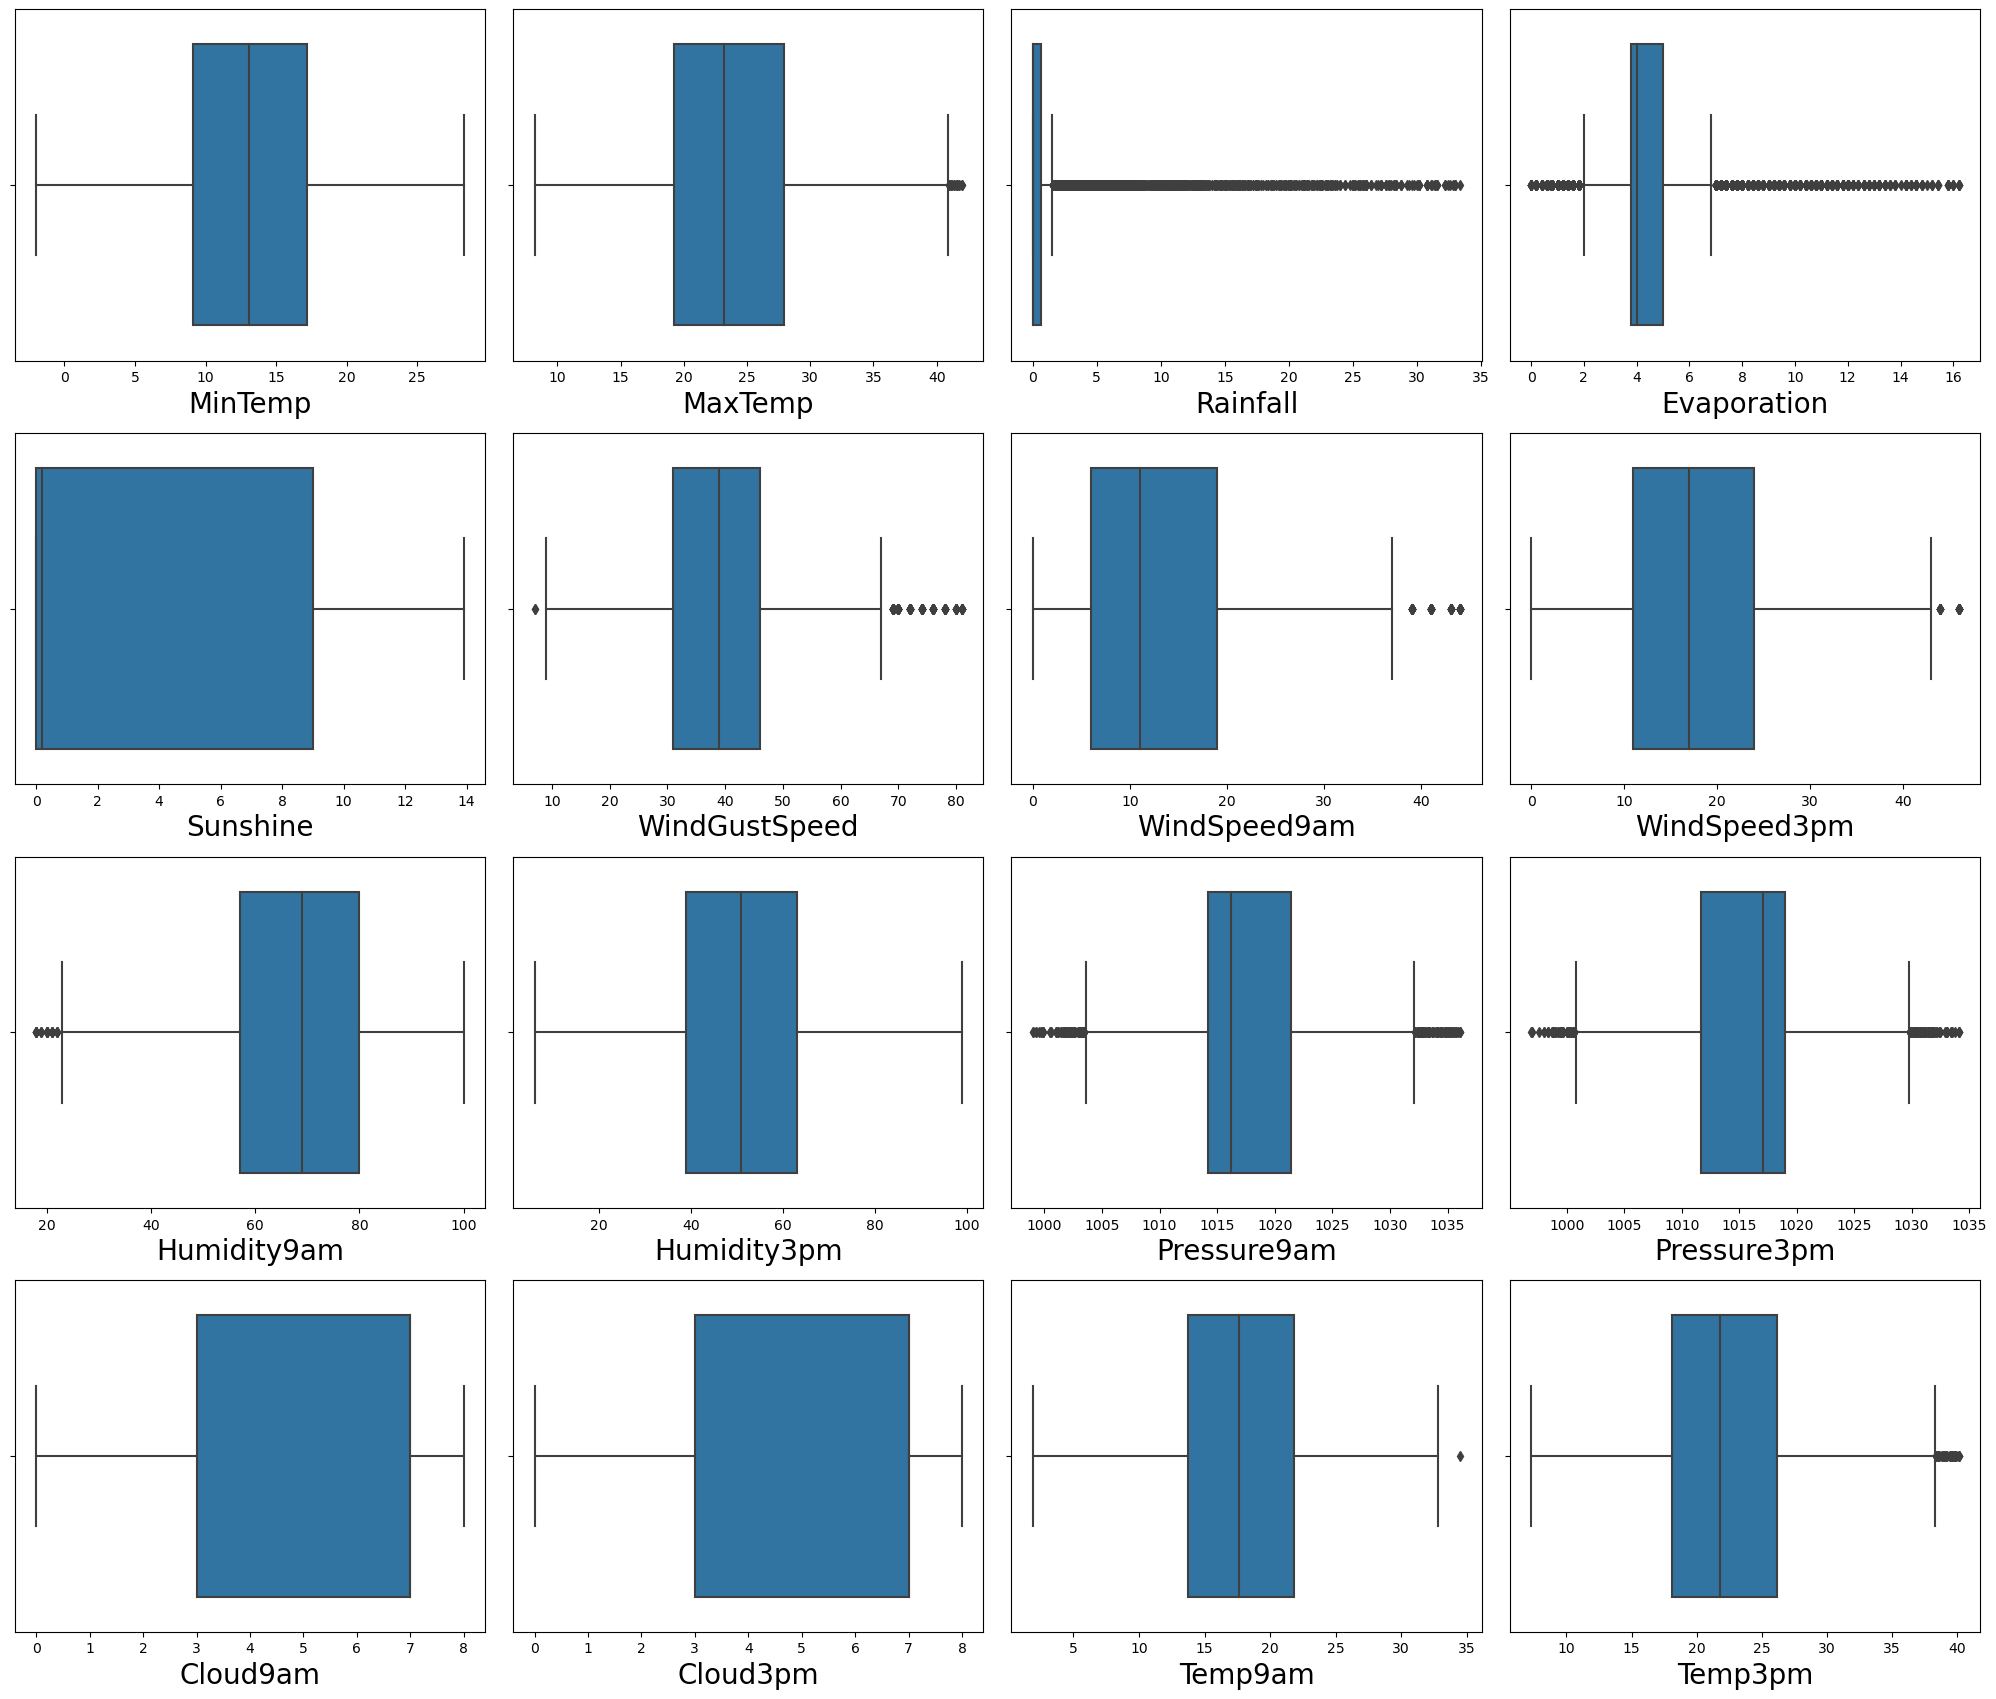

In [97]:
# Identifying the outliers using boxplot

plt.figure(figsize=(20,25))
plotnumber=1
for i in num_col:
    if plotnumber<=24:
        ax=plt.subplot(6,4,plotnumber)
        sns.boxplot(dfn[i])
        plt.xlabel(i,fontsize=20)
    plotnumber+=1
plt.tight_layout()

# Checking for skewness

In [98]:
# Checking the skewness
dfn.skew()

MinTemp         -0.078160
MaxTemp          0.327128
Rainfall         3.518724
Evaporation      1.507495
Sunshine         0.593800
WindGustSpeed    0.536437
WindSpeed9am     0.722205
WindSpeed3pm     0.323679
Humidity9am     -0.237692
Humidity3pm      0.117050
Pressure9am      0.232142
Pressure3pm     -0.138552
Cloud9am        -0.845950
Cloud3pm        -0.783146
Temp9am         -0.028800
Temp3pm          0.350851
Year             0.430556
Month            0.054792
Day              0.002232
dtype: float64

We need to remove skewness from the columns where skewness is more >0.5 and <-0.5, for continuous data type columns

In [99]:
#Skew columns assigning to seperate list
Skew_col = ['Rainfall', "Evaporation", "Sunshine", "WindGustSpeed", "WindSpeed9am", "Cloud9am",
            "Cloud3pm"]

In [100]:
#importing power transformer library fro yeo johnson method
from sklearn.preprocessing import PowerTransformer
scaler = PowerTransformer(method='yeo-johnson')

In [101]:
dfn[Skew_col] = scaler.fit_transform(dfn[Skew_col].values)
dfn[Skew_col].head()

Rainfall  Evaporation  Sunshine  WindGustSpeed  WindSpeed9am  Cloud9am  \
0  0.773027    -0.090354   -0.9523       0.449852      0.789493  1.174725   
1 -0.654076    -0.090354   -0.9523       0.449852     -0.977515  0.656350   
2 -0.654076    -0.090354   -0.9523       0.594848      0.705758  0.656350   
3 -0.654076    -0.090354   -0.9523      -1.249784     -0.056219  0.656350   
4  1.135524    -0.090354   -0.9523       0.225685     -0.534239  0.656350   

   Cloud3pm  
0  0.706043  
1  0.706043  
2 -1.315787  
3  0.706043  
4  1.237701

In [102]:
# Checking skewness after removing skewness with yeo-johnson
dfn.skew()

MinTemp         -0.078160
MaxTemp          0.327128
Rainfall         1.041316
Evaporation      0.031839
Sunshine         0.196645
WindGustSpeed    0.004332
WindSpeed9am    -0.109077
WindSpeed3pm     0.323679
Humidity9am     -0.237692
Humidity3pm      0.117050
Pressure9am      0.232142
Pressure3pm     -0.138552
Cloud9am        -0.654028
Cloud3pm        -0.582904
Temp9am         -0.028800
Temp3pm          0.350851
Year             0.430556
Month            0.054792
Day              0.002232
dtype: float64

Skewness is removed from almost all the columns

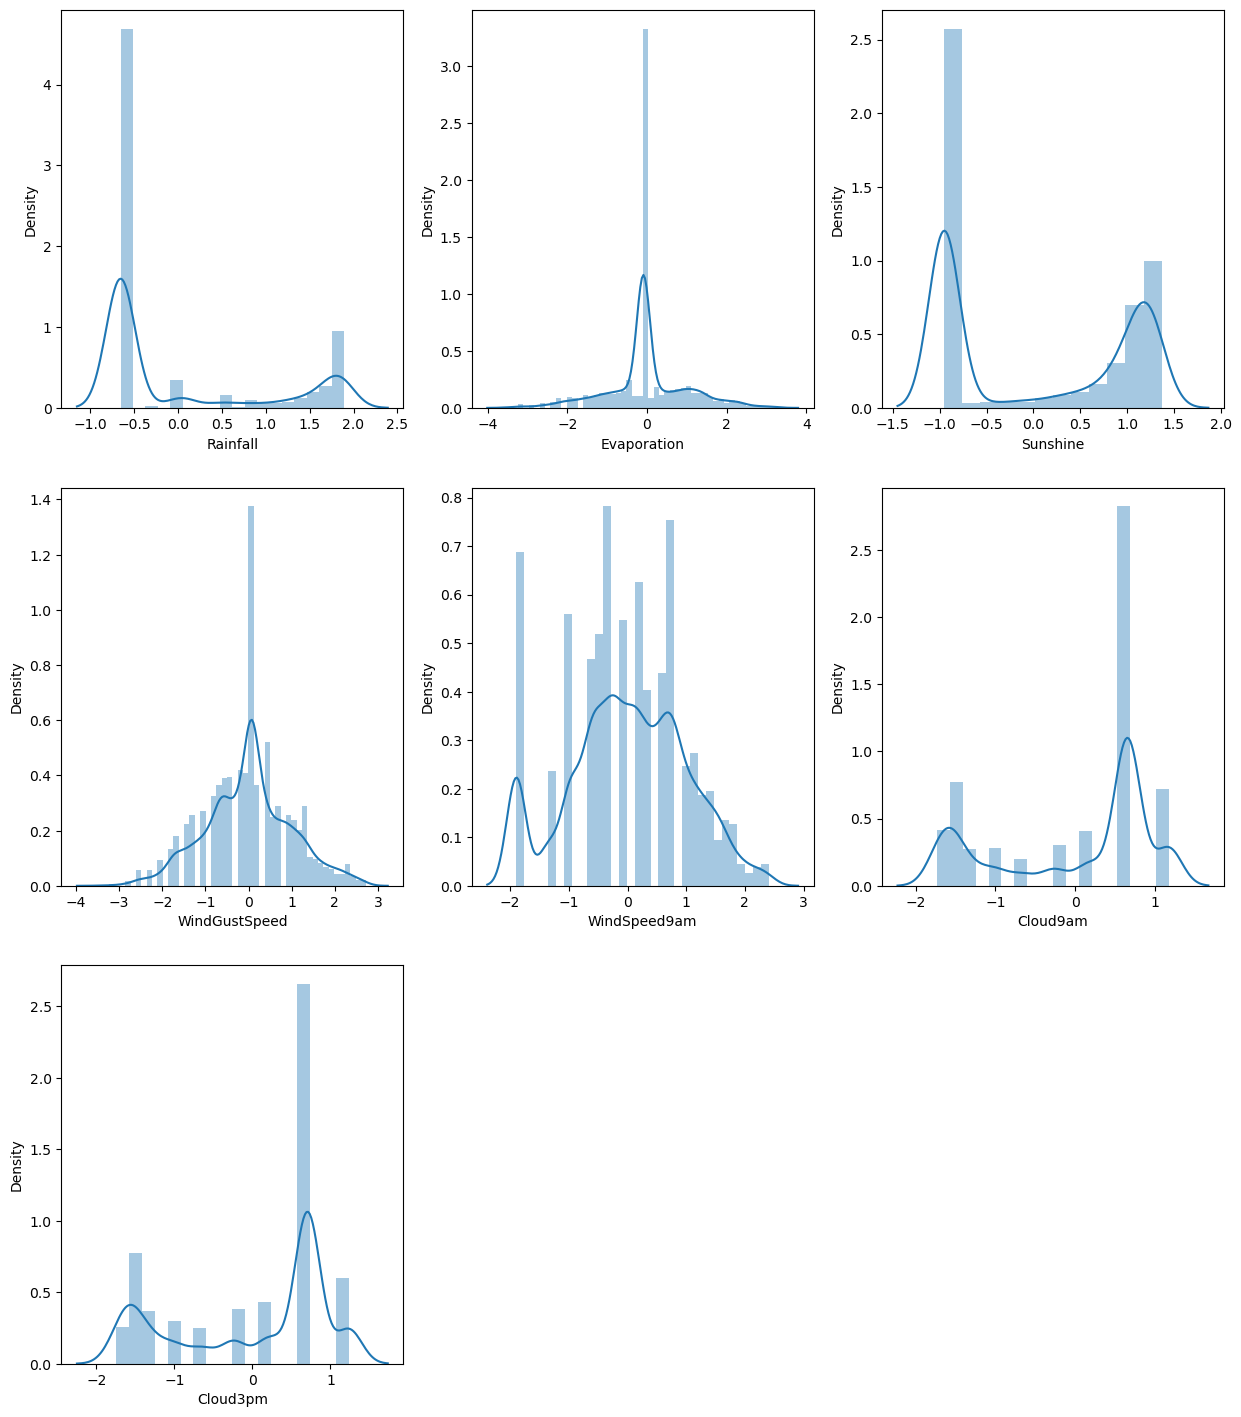

In [103]:
#lets check the skewness using visual method
plt.figure(figsize=(15,30))
for i in enumerate(Skew_col):
    plt.subplot(5,3,i[0]+1)
    sns.distplot(dfn[i[1]])

# Categorical Data label Encoding

replacing the yes/No in the RaonTomorrow and RainToday columns with 0 & 1

In [104]:
dfn['RainTomorrow'].replace('No',0,inplace=True)
dfn['RainTomorrow'].replace('Yes',1,inplace=True)

dfn['RainToday'].replace('No',0,inplace=True)
dfn['RainToday'].replace('Yes',1,inplace=True)

In [105]:
dfn.head()

Location  MinTemp  MaxTemp  Rainfall  Evaporation  Sunshine WindGustDir  \
0   Albury     13.4     22.9  0.773027    -0.090354   -0.9523           W   
1   Albury      7.4     25.1 -0.654076    -0.090354   -0.9523         WNW   
2   Albury     12.9     25.7 -0.654076    -0.090354   -0.9523         WSW   
3   Albury      9.2     28.0 -0.654076    -0.090354   -0.9523          NE   
4   Albury     17.5     32.3  1.135524    -0.090354   -0.9523           W   

   WindGustSpeed WindDir9am WindDir3pm  ...  Pressure3pm  Cloud9am  Cloud3pm  \
0       0.449852          W        WNW  ...       1007.1  1.174725  0.706043   
1       0.449852        NNW        WSW  ...       1007.8  0.656350  0.706043   
2       0.594848          W        WSW  ...       1008.7  0.656350 -1.315787   
3      -1.249784         SE          E  ...       1012.8  0.656350  0.706043   
4       0.225685        ENE         NW  ...       1006.0  0.656350  1.237701   

   Temp9am  Temp3pm  RainToday  RainTomorrow  Year  Month  Day  
0     16.9     21.8          0             0  2008     12    1  
1     17.2     24.3          0             0  2008     12    2  
2     21.0     23.2          0             0  2008     12    3  
3     18.1     26.5          0             0  2008     12    4  
4     17.8     29.7          0             0  2008     12    5  

[5 rows x 25 columns]

In [106]:
dfn.tail()

Location  MinTemp  MaxTemp  Rainfall  Evaporation  Sunshine WindGustDir  \
8420    Uluru      2.8     23.4 -0.654076    -0.090354   -0.9523           E   
8421    Uluru      3.6     25.3 -0.654076    -0.090354   -0.9523         NNW   
8422    Uluru      5.4     26.9 -0.654076    -0.090354   -0.9523           N   
8423    Uluru      7.8     27.0 -0.654076    -0.090354   -0.9523          SE   
8424    Uluru     14.9     19.0 -0.654076    -0.090354   -0.9523           N   

      WindGustSpeed WindDir9am WindDir3pm  ...  Pressure3pm  Cloud9am  \
8420      -0.591581         SE        ENE  ...       1020.3  0.656350   
8421      -1.455709         SE          N  ...       1019.1  0.656350   
8422      -0.087083         SE        WNW  ...       1016.8  0.656350   
8423      -0.863064        SSE          N  ...       1016.5 -1.010175   
8424       0.071409        ESE        ESE  ...       1017.9  1.174725   

      Cloud3pm  Temp9am  Temp3pm  RainToday  RainTomorrow  Year  Month  Day  
8420  0.706043     10.1     22.4          0             0  2017      6   21  
8421  0.706043     10.9     24.5          0             0  2017      6   22  
8422  0.706043     12.5     26.1          0             0  2017      6   23  
8423 -1.315787     15.1     26.0          0             0  2017      6   24  
8424  1.237701     15.0     20.9          0             0  2017      6   25  

[5 rows x 25 columns]

In [107]:
dfn["RainTomorrow"].unique()

array([0, 1], dtype=int64)

In [108]:
dfn["RainToday"].unique()

array([0, 1], dtype=int64)

In [109]:
cat_col

['Date',
 'Location',
 'WindGustDir',
 'WindDir9am',
 'WindDir3pm',
 'RainToday',
 'RainTomorrow']

In [110]:
Cat_col = ['Location',
 'WindGustDir',
 'WindDir9am',
 'WindDir3pm']

In [111]:
#importing labelEncoder library and Tranforming the categorical data

from sklearn.preprocessing import LabelEncoder
LE=LabelEncoder()
dfn[Cat_col]= dfn[Cat_col].apply(LE.fit_transform)
dfn[Cat_col]

Location  WindGustDir  WindDir9am  WindDir3pm
0            1           13          13          14
1            1           14           6          15
2            1           15          13          15
3            1            4           9           0
4            1           13           1           7
...        ...          ...         ...         ...
8420         9            0           9           1
8421         9            6           9           3
8422         9            3           9          14
8423         9            9          10           3
8424         9            3           2           2

[7986 rows x 4 columns]

In [112]:
#lets check the correlation between target variable and all the features
dfn.corr()

Location   MinTemp   MaxTemp  Rainfall  Evaporation  Sunshine  \
Location       1.000000  0.116661  0.063374  0.009686     0.090686 -0.126860   
MinTemp        0.116661  1.000000  0.717729  0.062827     0.401778  0.132620   
MaxTemp        0.063374  0.717729  1.000000 -0.245484     0.492894  0.212367   
Rainfall       0.009686  0.062827 -0.245484  1.000000    -0.204297 -0.110531   
Evaporation    0.090686  0.401778  0.492894 -0.204297     1.000000  0.177774   
Sunshine      -0.126860  0.132620  0.212367 -0.110531     0.177774  1.000000   
WindGustDir   -0.037752 -0.153277 -0.231470  0.134100    -0.102473 -0.007797   
WindGustSpeed  0.256528  0.250493  0.151717  0.072644     0.205070  0.111998   
WindDir9am    -0.040598 -0.042955 -0.212715  0.155815    -0.079320  0.034716   
WindDir3pm    -0.031205 -0.153982 -0.190317  0.119930    -0.039577 -0.032012   
WindSpeed9am   0.240853  0.163868  0.025085  0.025404     0.162214  0.285548   
WindSpeed3pm   0.228533  0.189950  0.097834  0.020644     0.144342  0.214603   
Humidity9am    0.004012 -0.127710 -0.383826  0.405783    -0.376215 -0.325783   
Humidity3pm    0.060605  0.088943 -0.410213  0.385817    -0.248693 -0.235090   
Pressure9am   -0.039289 -0.415328 -0.324094 -0.105249    -0.253528  0.053045   
Pressure3pm   -0.000065 -0.435792 -0.414617 -0.019377    -0.284289 -0.095744   
Cloud9am       0.042800  0.006197 -0.245189  0.216944    -0.160655 -0.512249   
Cloud3pm       0.023892 -0.043339 -0.244180  0.182573    -0.177768 -0.477382   
Temp9am        0.117203  0.888441  0.863498 -0.109053     0.481351  0.220255   
Temp3pm        0.059913  0.689531  0.973802 -0.256534     0.476615  0.203489   
RainToday      0.003097  0.061863 -0.217736  0.933364    -0.173927 -0.082331   
RainTomorrow   0.009530  0.091113 -0.146854  0.316005    -0.093763 -0.130083   
Year           0.480597  0.038847  0.116624  0.003751     0.073483 -0.323548   
Month         -0.086866 -0.247304 -0.162911 -0.005318    -0.029153  0.033088   
Day           -0.005677  0.010131  0.016650 -0.017883     0.014600  0.005926   

               WindGustDir  WindGustSpeed  WindDir9am  WindDir3pm  ...  \
Location         -0.037752       0.256528   -0.040598   -0.031205  ...   
MinTemp          -0.153277       0.250493   -0.042955   -0.153982  ...   
MaxTemp          -0.231470       0.151717   -0.212715   -0.190317  ...   
Rainfall          0.134100       0.072644    0.155815    0.119930  ...   
Evaporation      -0.102473       0.205070   -0.079320   -0.039577  ...   
Sunshine         -0.007797       0.111998    0.034716   -0.032012  ...   
WindGustDir       1.000000       0.010874    0.405246    0.508379  ...   
WindGustSpeed     0.010874       1.000000   -0.060262    0.082126  ...   
WindDir9am        0.405246      -0.060262    1.000000    0.244263  ...   
WindDir3pm        0.508379       0.082126    0.244263    1.000000  ...   
WindSpeed9am      0.083626       0.546491    0.145722    0.040417  ...   
WindSpeed3pm      0.119131       0.633710    0.066970    0.075636  ...   
Humidity9am       0.028997      -0.278267    0.006558   -0.007714  ...   
Humidity3pm       0.048538      -0.089230    0.116334   -0.008455  ...   
Pressure9am      -0.053995      -0.349491    0.019055   -0.128473  ...   
Pressure3pm      -0.045459      -0.341915    0.056072   -0.036071  ...   
Cloud9am          0.157637      -0.030973    0.085381    0.081452  ...   
Cloud3pm          0.124790       0.001206    0.061516    0.051870  ...   
Temp9am          -0.181862       0.220905   -0.097174   -0.171706  ...   
Temp3pm          -0.243155       0.117553   -0.219792   -0.203107  ...   
RainToday         0.120785       0.076495    0.148555    0.100307  ...   
RainTomorrow      0.044030       0.173221    0.027015    0.004108  ...   
Year             -0.095835      -0.031199   -0.034052   -0.010028  ...   
Month             0.038869       0.045848    0.019032    0.028417  ...   
Day               0.017399      -0.005303   -0.010103   -0.000711  ...   

         

<AxesSubplot:>

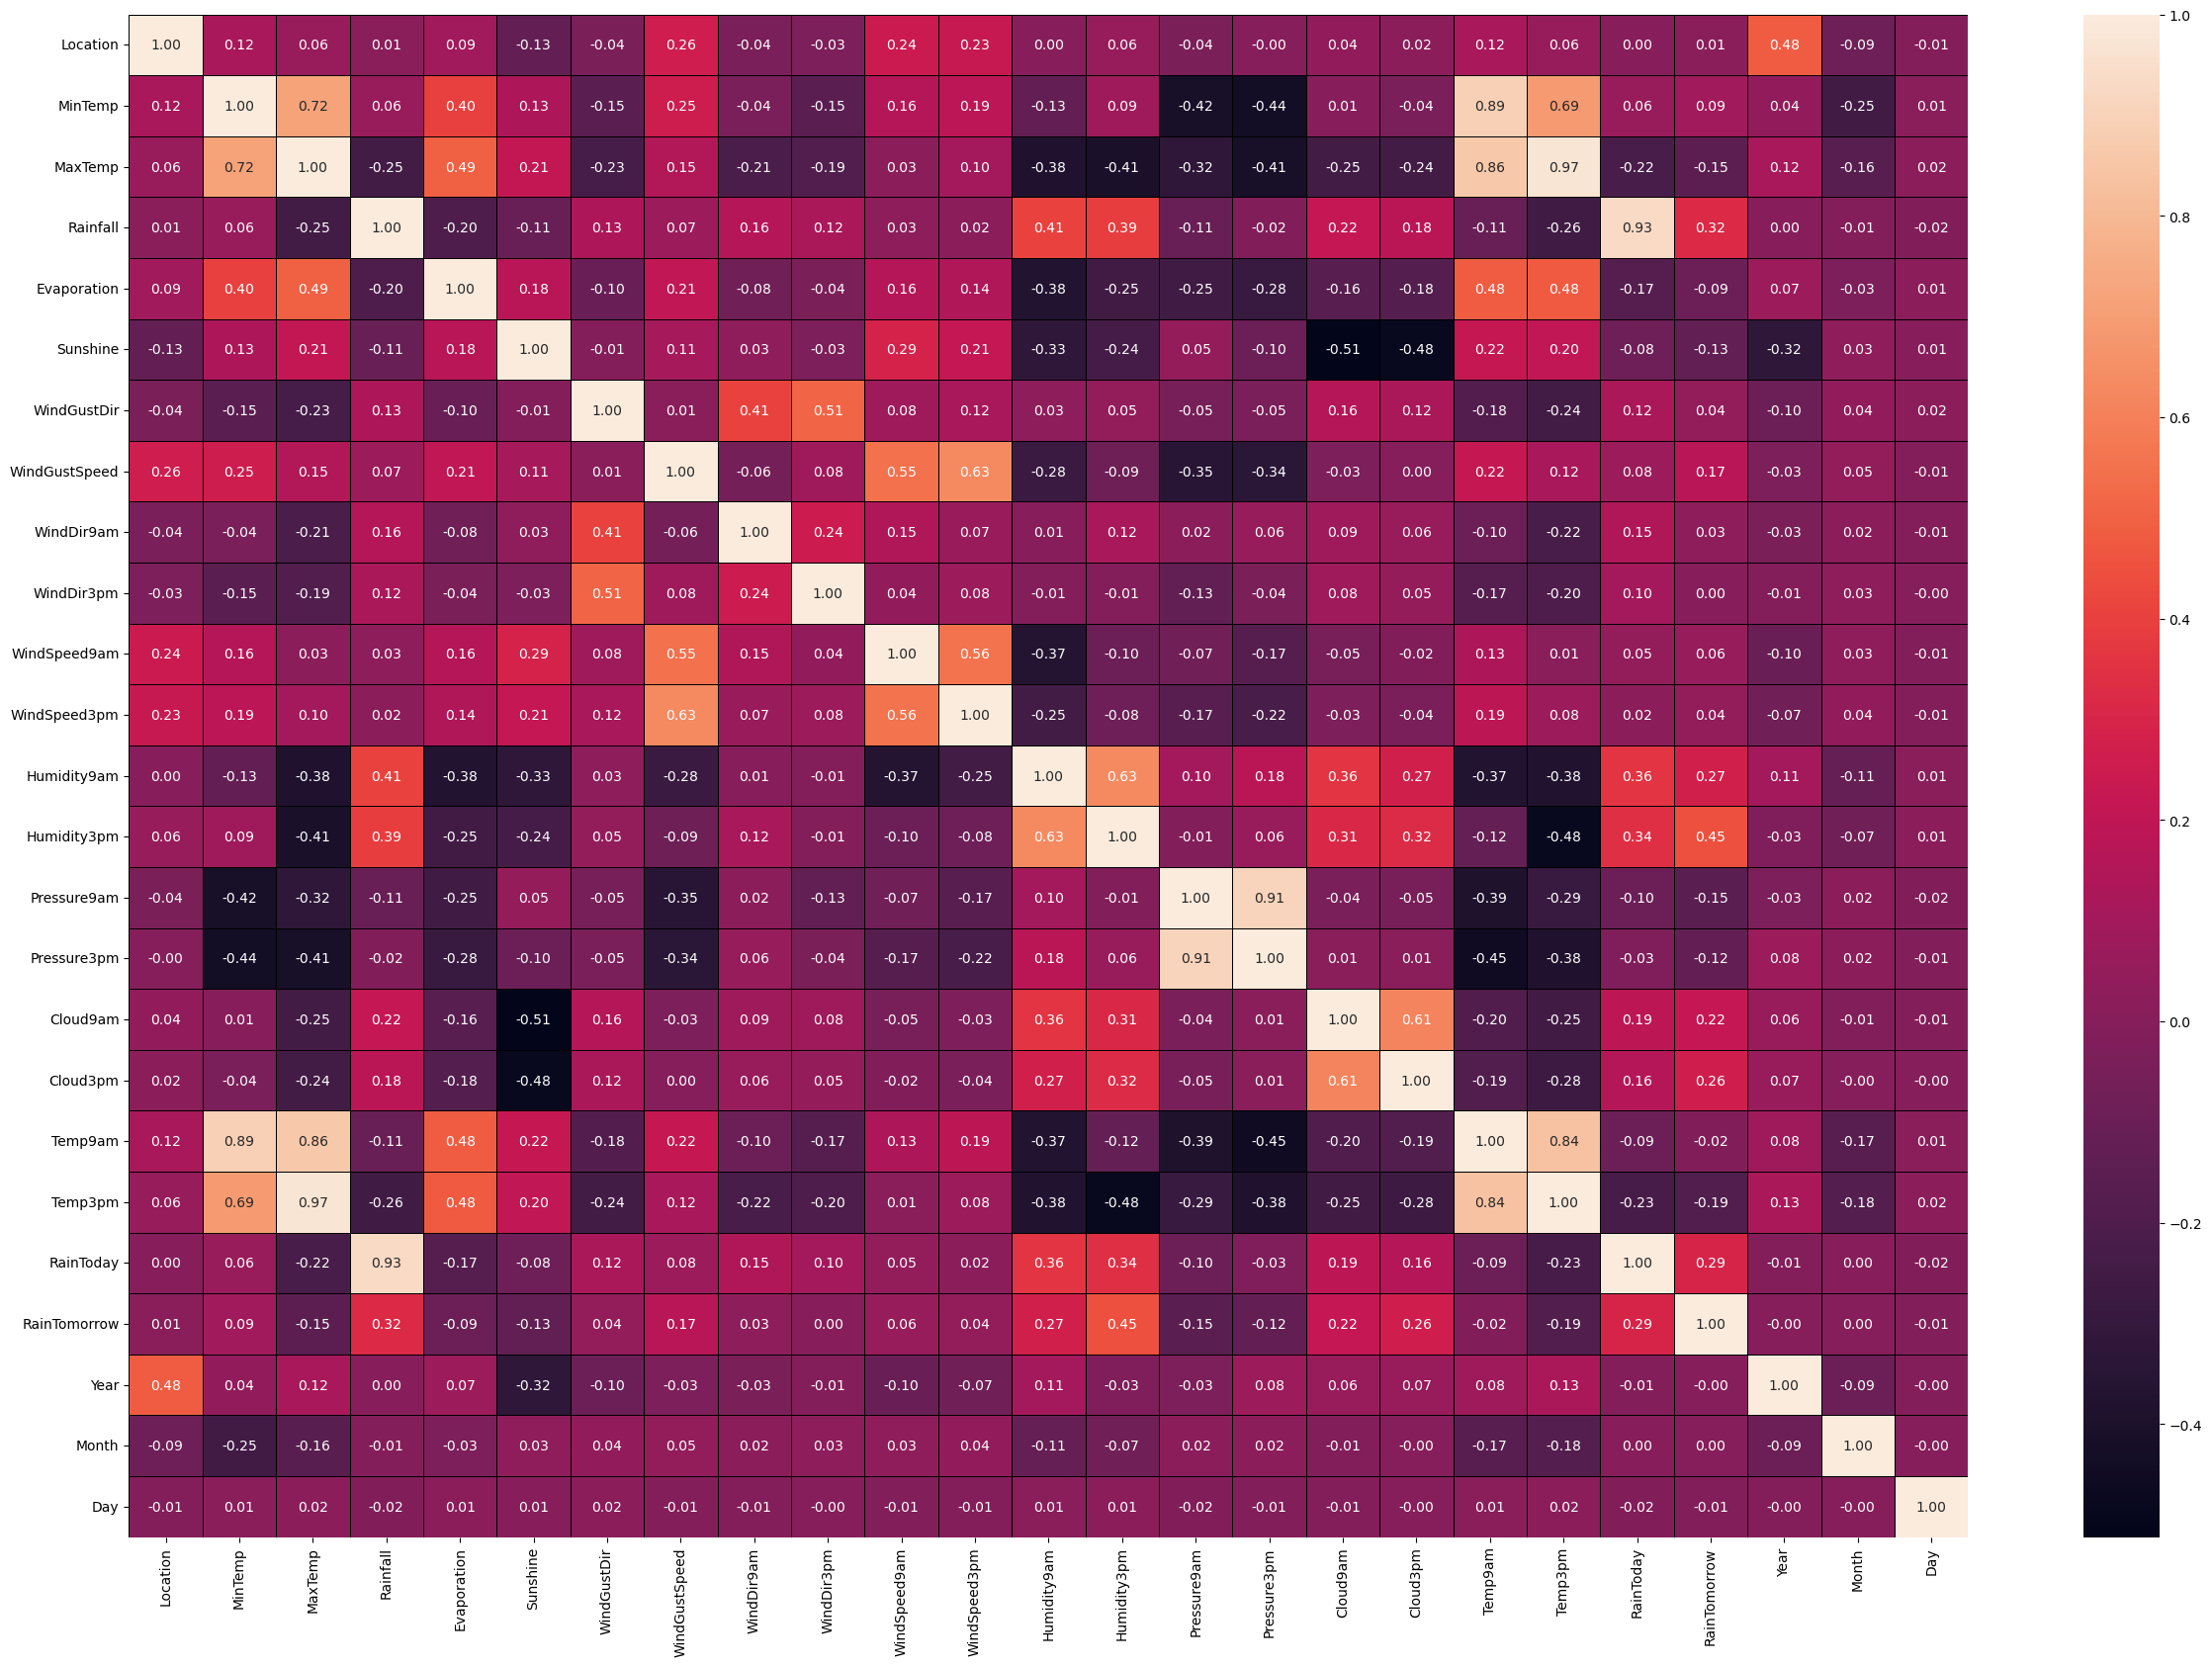

In [113]:
# heat map for correaltion

plt.figure(figsize=(30,20))
sns.heatmap(dfn.corr(),annot=True,linewidth=0.5,linecolor='black',fmt='0.2f')

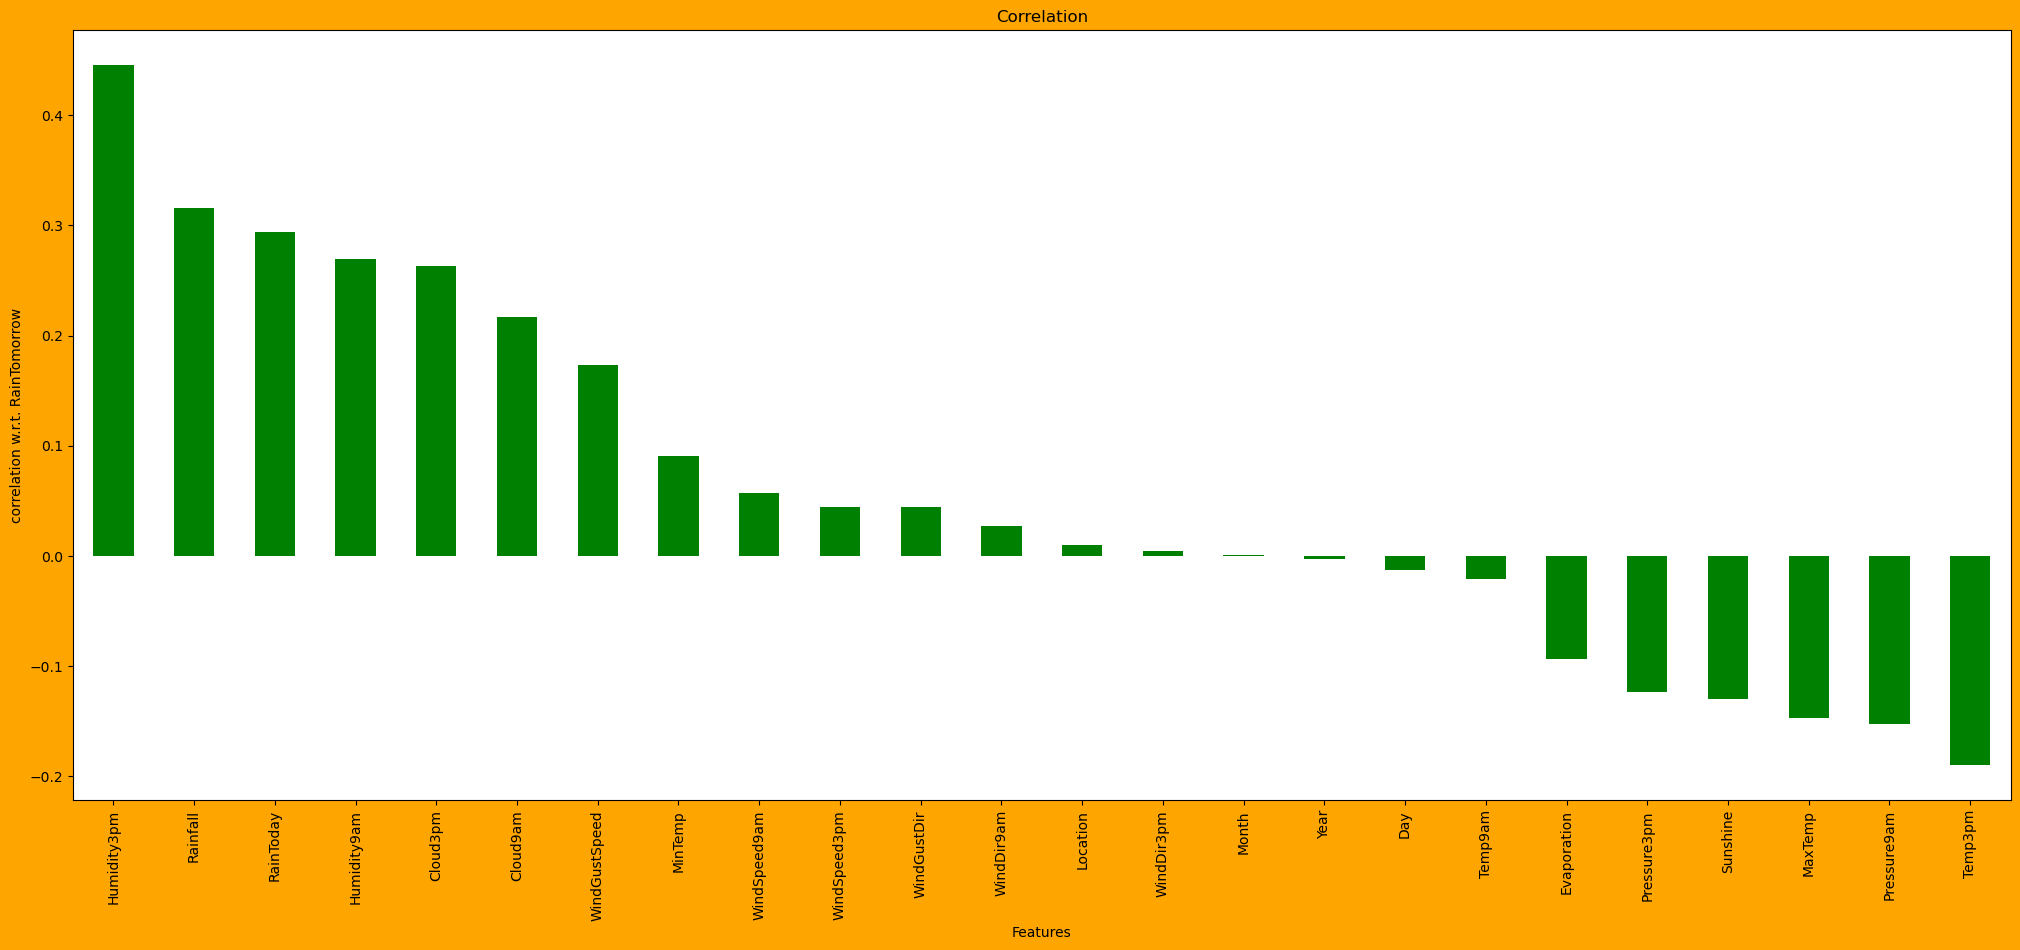

In [115]:
plt.figure(figsize =(25, 10),facecolor = 'orange')
dfn.corr()['RainTomorrow'].sort_values(ascending = False).drop(['RainTomorrow']).plot(kind ='bar', color ='green')
plt.xlabel('Features')
plt.ylabel('correlation w.r.t. RainTomorrow')
plt.title('Correlation')
plt.show()

# Splitting the data into Input and Output

In [116]:
x = dfn.drop(['RainTomorrow'], axis=1)
y = dfn['RainTomorrow']

In [117]:
print(x.shape)
print(y.shape)

(7986, 24)
(7986,)


In [118]:
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()

x_scaled = scaler.fit_transform(x)

In [119]:
x

Location  MinTemp  MaxTemp  Rainfall  Evaporation  Sunshine  \
0            1     13.4     22.9  0.773027    -0.090354   -0.9523   
1            1      7.4     25.1 -0.654076    -0.090354   -0.9523   
2            1     12.9     25.7 -0.654076    -0.090354   -0.9523   
3            1      9.2     28.0 -0.654076    -0.090354   -0.9523   
4            1     17.5     32.3  1.135524    -0.090354   -0.9523   
...        ...      ...      ...       ...          ...       ...   
8420         9      2.8     23.4 -0.654076    -0.090354   -0.9523   
8421         9      3.6     25.3 -0.654076    -0.090354   -0.9523   
8422         9      5.4     26.9 -0.654076    -0.090354   -0.9523   
8423         9      7.8     27.0 -0.654076    -0.090354   -0.9523   
8424         9     14.9     19.0 -0.654076    -0.090354   -0.9523   

      WindGustDir  WindGustSpeed  WindDir9am  WindDir3pm  ...  Pressure9am  \
0              13       0.449852          13          14  ...       1007.7   
1              14       0.449852           6          15  ...       1010.6   
2              15       0.594848          13          15  ...       1007.6   
3               4      -1.249784           9           0  ...       1017.6   
4              13       0.225685           1           7  ...       1010.8   
...           ...            ...         ...         ...  ...          ...   
8420            0      -0.591581           9           1  ...       1024.6   
8421            6      -1.455709           9           3  ...       1023.5   
8422            3      -0.087083           9          14  ...       1021.0   
8423            9      -0.863064          10           3  ...       1019.4   
8424            3       0.071409           2           2  ...       1020.2   

      Pressure3pm  Cloud9am  Cloud3pm  Temp9am  Temp3pm  RainToday  Year  \
0          1007.1  1.174725  0.706043     16.9     21.8          0  2008   
1          1007.8  0.656350  0.706043     17.2     24.3          0  2008   
2          1008.7  0.656350 -1.315787     21.0     23.2          0  2008   
3          1012.8  0.656350  0.706043     18.1     26.5          0  2008   
4          1006.0  0.656350  1.237701     17.8     29.7          0  2008   
...           ...       ...       ...      ...      ...        ...   ...   
8420       1020.3  0.656350  0.706043     10.1     22.4          0  2017   
8421       1019.1  0.656350  0.706043     10.9     24.5          0  2017   
8422       1016.8  0.656350  0.706043     12.5     26.1          0  2017   
8423       1016.5 -1.010175 -1.315787     15.1     26.0          0  2017   
8424       1017.9  1.174725  1.237701     15.0     20.9          0  2017   

      Month  Day  
0        12    1  
1        12    2  
2        12    3  
3        12    4  
4        12    5  
...     ...  ...  
8420      6   21  
8421      6   22  
8422      6   23  
8423      6   24  
8424      6   25  

[7986 rows x 24 columns]

In [120]:
from statsmodels.stats.outliers_influence import variance_inflation_factor

vif = pd.DataFrame()

vif['vif'] = [variance_inflation_factor(x_scaled, i) for i in range (x_scaled.shape[1])]

vif['features'] = x.columns


# Lets check the values 
vif

vif       features
0    1.585138       Location
1    8.830550        MinTemp
2   24.852668        MaxTemp
3    8.489063       Rainfall
4    1.476763    Evaporation
5    2.013739       Sunshine
6    1.650302    WindGustDir
7    2.344442  WindGustSpeed
8    1.349370     WindDir9am
9    1.499214     WindDir3pm
10   2.263954   WindSpeed9am
11   2.020324   WindSpeed3pm
12   4.001364    Humidity9am
13   5.369433    Humidity3pm
14   8.739820    Pressure9am
15   8.640722    Pressure3pm
16   2.085335       Cloud9am
17   1.821632       Cloud3pm
18  17.705208        Temp9am
19  32.345133        Temp3pm
20   7.861000      RainToday
21   1.697301           Year
22   1.152844          Month
23   1.004383            Day

The Temp3pm and MaxTemp has strong correlation, we will remove any one column from these two


In [121]:
x = x.drop(['Temp3pm'], axis=1)

x.head()

Location  MinTemp  MaxTemp  Rainfall  Evaporation  Sunshine  WindGustDir  \
0         1     13.4     22.9  0.773027    -0.090354   -0.9523           13   
1         1      7.4     25.1 -0.654076    -0.090354   -0.9523           14   
2         1     12.9     25.7 -0.654076    -0.090354   -0.9523           15   
3         1      9.2     28.0 -0.654076    -0.090354   -0.9523            4   
4         1     17.5     32.3  1.135524    -0.090354   -0.9523           13   

   WindGustSpeed  WindDir9am  WindDir3pm  ...  Humidity3pm  Pressure9am  \
0       0.449852          13          14  ...         22.0       1007.7   
1       0.449852           6          15  ...         25.0       1010.6   
2       0.594848          13          15  ...         30.0       1007.6   
3      -1.249784           9           0  ...         16.0       1017.6   
4       0.225685           1           7  ...         33.0       1010.8   

   Pressure3pm  Cloud9am  Cloud3pm  Temp9am  RainToday  Year  Month  Day  
0       1007.1  1.174725  0.706043     16.9          0  2008     12    1  
1       1007.8  0.656350  0.706043     17.2          0  2008     12    2  
2       1008.7  0.656350 -1.315787     21.0          0  2008     12    3  
3       1012.8  0.656350  0.706043     18.1          0  2008     12    4  
4       1006.0  0.656350  1.237701     17.8          0  2008     12    5  

[5 rows x 23 columns]

In [122]:
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()

x_scaled = scaler.fit_transform(x)

In [123]:
from statsmodels.stats.outliers_influence import variance_inflation_factor

vif = pd.DataFrame()

vif['vif'] = [variance_inflation_factor(x_scaled, i) for i in range (x_scaled.shape[1])]

vif['features'] = x.columns
vif

vif       features
0    1.584417       Location
1    8.775589        MinTemp
2    9.109906        MaxTemp
3    8.489055       Rainfall
4    1.476648    Evaporation
5    1.980437       Sunshine
6    1.644011    WindGustDir
7    2.336484  WindGustSpeed
8    1.347791     WindDir9am
9    1.497254     WindDir3pm
10   2.263496   WindSpeed9am
11   2.014136   WindSpeed3pm
12   3.562703    Humidity9am
13   3.521895    Humidity3pm
14   8.505825    Pressure9am
15   8.453160    Pressure3pm
16   2.085117       Cloud9am
17   1.805058       Cloud3pm
18  16.277048        Temp9am
19   7.860011      RainToday
20   1.697241           Year
21   1.139826          Month
22   1.003635            Day

In [124]:
x = x.drop(['Temp9am'], axis=1)

x.head()

Location  MinTemp  MaxTemp  Rainfall  Evaporation  Sunshine  WindGustDir  \
0         1     13.4     22.9  0.773027    -0.090354   -0.9523           13   
1         1      7.4     25.1 -0.654076    -0.090354   -0.9523           14   
2         1     12.9     25.7 -0.654076    -0.090354   -0.9523           15   
3         1      9.2     28.0 -0.654076    -0.090354   -0.9523            4   
4         1     17.5     32.3  1.135524    -0.090354   -0.9523           13   

   WindGustSpeed  WindDir9am  WindDir3pm  ...  Humidity9am  Humidity3pm  \
0       0.449852          13          14  ...         71.0         22.0   
1       0.449852           6          15  ...         44.0         25.0   
2       0.594848          13          15  ...         38.0         30.0   
3      -1.249784           9           0  ...         45.0         16.0   
4       0.225685           1           7  ...         82.0         33.0   

   Pressure9am  Pressure3pm  Cloud9am  Cloud3pm  RainToday  Year  Month  Day  
0       1007.7       1007.1  1.174725  0.706043          0  2008     12    1  
1       1010.6       1007.8  0.656350  0.706043          0  2008     12    2  
2       1007.6       1008.7  0.656350 -1.315787          0  2008     12    3  
3       1017.6       1012.8  0.656350  0.706043          0  2008     12    4  
4       1010.8       1006.0  0.656350  1.237701          0  2008     12    5  

[5 rows x 22 columns]

In [125]:
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()

x_scaled = scaler.fit_transform(x)

In [126]:
from statsmodels.stats.outliers_influence import variance_inflation_factor

vif = pd.DataFrame()

vif['vif'] = [variance_inflation_factor(x_scaled, i) for i in range (x_scaled.shape[1])]

vif['features'] = x.columns
vif

vif       features
0   1.581808       Location
1   4.576284        MinTemp
2   5.522218        MaxTemp
3   8.484283       Rainfall
4   1.476058    Evaporation
5   1.980429       Sunshine
6   1.641416    WindGustDir
7   2.299427  WindGustSpeed
8   1.347355     WindDir9am
9   1.496819     WindDir3pm
10  2.228498   WindSpeed9am
11  1.967419   WindSpeed3pm
12  2.527574    Humidity9am
13  2.829302    Humidity3pm
14  8.496863    Pressure9am
15  8.425917    Pressure3pm
16  2.042036       Cloud9am
17  1.793470       Cloud3pm
18  7.859929      RainToday
19  1.661828           Year
20  1.126628          Month
21  1.003393            Day

VIF is reduced below 10.

# Model Building

# Splitting the data for training and testing:

In [127]:
y.value_counts()

0    6164
1    1822
Name: RainTomorrow, dtype: int64

We need to balance the data

# Balancing The Data

In [128]:
#importing smote library
from imblearn.over_sampling import SMOTE
sm=SMOTE()

In [129]:
#Applying SMOTE technique on DATa
X,Y=sm.fit_resample(x,y)

X.shape, Y.shape

((12328, 22), (12328,))

In [130]:
Y.value_counts()

0    6164
1    6164
Name: RainTomorrow, dtype: int64

Now the data is balanced

# Splitting the data for training and testing:

In [131]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score,confusion_matrix,classification_report

In [132]:
# To Find the best Random_state

maxaccu=0
maxRS=0

for i in range(0,200):
    X_train,X_test,Y_train,Y_test= train_test_split(X,Y,random_state=i,test_size=.20)
    LR= LogisticRegression()
    LR.fit(X_train,Y_train)
    pred= LR.predict(X_test)
    acc=accuracy_score(Y_test,pred)
    if acc>maxaccu:
        maxaccu=acc
        maxRS=i
print("Best accuracy is ",maxaccu,"on Random State =",maxRS)

Best accuracy is  0.7733171127331712 on Random State = 47


In [133]:
#selecting Random State 47

X_train,X_test,Y_train,Y_test= train_test_split(X,Y,random_state=47,test_size=.20)

In [134]:
#importing all reuired machine learning algorithm libraries
from sklearn.linear_model import LogisticRegression
from sklearn.linear_model import RidgeClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.svm import SVC
from sklearn.neighbors import KNeighborsClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.linear_model import SGDClassifier
from sklearn.ensemble import BaggingClassifier
from sklearn.ensemble import AdaBoostClassifier
from sklearn.ensemble import GradientBoostingClassifier

In [135]:
LR_model= LogisticRegression()
RD_model= RidgeClassifier()
DT_model= DecisionTreeClassifier()
SV_model= SVC()
KNR_model= KNeighborsClassifier()
RFR_model= RandomForestClassifier()
SGH_model= SGDClassifier()
Bag_model=BaggingClassifier()
ADA_model=AdaBoostClassifier()
GB_model= GradientBoostingClassifier()

model=[LR_model,RD_model,DT_model,SV_model,KNR_model,RFR_model,SGH_model,Bag_model,ADA_model,GB_model ]

In [136]:
#Trying different algorithms for training & testing
for i in model:
    i.fit(X_train,Y_train)
    i.score(X_train,Y_train)
    pred= i.predict(X_test)
    print('Accuracy_Score of ',i, 'is', accuracy_score(Y_test,pred)*100)
    print('Confusion Matrix of ',i,' is \n', confusion_matrix(Y_test,pred) )
    print(classification_report(Y_test,pred))
    print('=='*40)

Accuracy_Score of  LogisticRegression() is 77.33171127331711
Confusion Matrix of  LogisticRegression()  is 
 [[993 278]
 [281 914]]
              precision    recall  f1-score   support

           0       0.78      0.78      0.78      1271
           1       0.77      0.76      0.77      1195

    accuracy                           0.77      2466
   macro avg       0.77      0.77      0.77      2466
weighted avg       0.77      0.77      0.77      2466

Accuracy_Score of  RidgeClassifier() is 77.8183292781833
Confusion Matrix of  RidgeClassifier()  is 
 [[1028  243]
 [ 304  891]]
              precision    recall  f1-score   support

           0       0.77      0.81      0.79      1271
           1       0.79      0.75      0.77      1195

    accuracy                           0.78      2466
   macro avg       0.78      0.78      0.78      2466
weighted avg       0.78      0.78      0.78      2466

Accuracy_Score of  DecisionTreeClassifier() is 87.10462287104623
Confusion Matrix of 

Random forest is having 94% accuracy score

# CrossValidation

In [137]:
from sklearn.model_selection import cross_val_score

for i in model:
    print('Accuracy_Score of ',i, 'is', accuracy_score(Y_test,i.predict(X_test))*100)
    print("cross Validation accuracy score of ",i ," is ",cross_val_score(i,X,Y,cv=5, scoring='accuracy').mean()*100)
    print('=='*40)

Accuracy_Score of  LogisticRegression() is 77.33171127331711
cross Validation accuracy score of  LogisticRegression()  is  66.07082776058657
Accuracy_Score of  RidgeClassifier() is 77.8183292781833
cross Validation accuracy score of  RidgeClassifier()  is  68.91772733927868
Accuracy_Score of  DecisionTreeClassifier() is 87.10462287104623
cross Validation accuracy score of  DecisionTreeClassifier()  is  75.20284469186616
Accuracy_Score of  SVC() is 72.9521492295215
cross Validation accuracy score of  SVC()  is  71.31841564547625
Accuracy_Score of  KNeighborsClassifier() is 84.38767234387672
cross Validation accuracy score of  KNeighborsClassifier()  is  77.19870893235219
Accuracy_Score of  RandomForestClassifier() is 93.7956204379562
cross Validation accuracy score of  RandomForestClassifier()  is  78.27843170156727
Accuracy_Score of  SGDClassifier() is 75.83130575831306
cross Validation accuracy score of  SGDClassifier()  is  56.06688941202792
Accuracy_Score of  BaggingClassifier() is 

Based on these scores, the RandomForestClassifier() seems to be the best choice as it has the highest accuracy score and a relatively high cross-validation accuracy score, indicating good performance on unseen data.

# Hyper parameter tuning For RFClassifier

In [138]:
n_estimator= [200, 400]#, 600, 800, 1000]  # no of tree in Random forest, default is 100
max_features= ['auto','sqrt']#,'log2']  # no of features to create Decission Tree
max_depth=[10, 64, 118]#, 173, 227, 282, 336]  #  Max depth of decision tree
min_samples_split= [1,2,3]   # minimum  no of samples rerquired to split node
min_samples_leaf= [1,3,4]#,6,7,9]  #minimum no of samples required at each leaf node

param_grid= {'n_estimators': n_estimator,
             'max_features':max_features,
             'max_depth':max_depth,
             'min_samples_split':min_samples_split,
             'min_samples_leaf':min_samples_leaf,
             }
param_grid

{'n_estimators': [200, 400],
 'max_features': ['auto', 'sqrt'],
 'max_depth': [10, 64, 118],
 'min_samples_split': [1, 2, 3],
 'min_samples_leaf': [1, 3, 4]}

In [139]:
from sklearn.model_selection import GridSearchCV
grid_search=GridSearchCV(estimator=RFR_model,param_grid=param_grid,cv=5,n_jobs=-1,verbose=2)
grid_search.fit(X_train,Y_train)



Fitting 5 folds for each of 108 candidates, totalling 540 fits


GridSearchCV(cv=5, estimator=RandomForestClassifier(), n_jobs=-1,
             param_grid={'max_depth': [10, 64, 118],
                         'max_features': ['auto', 'sqrt'],
                         'min_samples_leaf': [1, 3, 4],
                         'min_samples_split': [1, 2, 3],
                         'n_estimators': [200, 400]},
             verbose=2)

In [140]:
grid_search.best_estimator_

RandomForestClassifier(max_depth=64, max_features='sqrt', min_samples_split=3,
                       n_estimators=200)

In [141]:
grid_search.best_params_

{'max_depth': 64,
 'max_features': 'sqrt',
 'min_samples_leaf': 1,
 'min_samples_split': 3,
 'n_estimators': 200}

In [142]:
GCV_pred=grid_search.best_estimator_.predict(X_test)
accuracy_score(Y_test,GCV_pred)

0.9399837793998378

# ROC AUC Plot

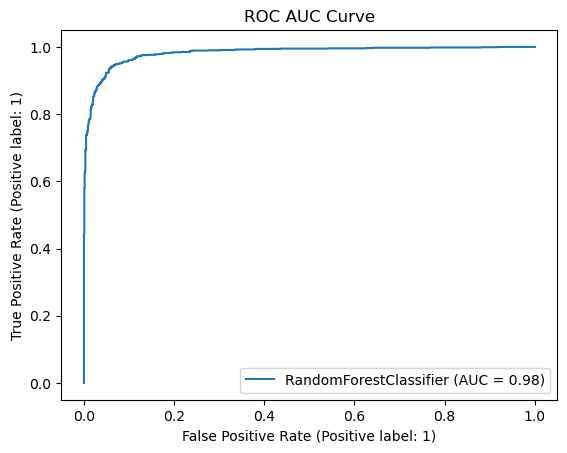

In [143]:
from sklearn.metrics import roc_auc_score,roc_curve,plot_roc_curve

plot_roc_curve(grid_search.best_estimator_,X_test,Y_test)
plt.title('ROC AUC Curve')
plt.show()

AUC is 98%, is a good one

# Saving the Model

In [144]:
import joblib
joblib.dump(grid_search.best_estimator_,"RainTomorrow_Pred.pkl")

['RainTomorrow_Pred.pkl']

# Testing/ Prediction

In [145]:
#Loading the saved model
GCV_pred=joblib.load("RainTomorrow_Pred.pkl")

#Prediction
prediction = GCV_pred.predict(X_test)
prediction

array([1, 1, 0, ..., 0, 0, 1], dtype=int64)

In [146]:
pd.DataFrame([GCV_pred.predict(X_test)[:],Y_test[:]],index=["Predicted","Actual"])

0     1     2     3     4     5     6     7     8     9     ...  \
Predicted     1     1     0     0     1     1     0     1     0     0  ...   
Actual        1     1     0     0     1     1     0     1     0     0  ...   

           2456  2457  2458  2459  2460  2461  2462  2463  2464  2465  
Predicted     0     1     0     1     1     1     0     0     0     1  
Actual        0     1     0     1     1     0     0     0     1     1  

[2 rows x 2466 columns]

# For Regression Model : Finding RainFall in MM

In [147]:
from sklearn.model_selection import train_test_split, RandomizedSearchCV, cross_val_score
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LinearRegression, Lasso,Ridge
from sklearn.neighbors import KNeighborsRegressor
from sklearn.ensemble import RandomForestRegressor, GradientBoostingRegressor, AdaBoostRegressor
from sklearn.tree import DecisionTreeRegressor
from sklearn.metrics import r2_score, mean_squared_error

In [148]:
df.head()

Location  MinTemp  MaxTemp  Rainfall  Evaporation  Sunshine WindGustDir  \
0   Albury     13.4     22.9       0.6          4.0       0.0           W   
1   Albury      7.4     25.1       0.0          4.0       0.0         WNW   
2   Albury     12.9     25.7       0.0          4.0       0.0         WSW   
3   Albury      9.2     28.0       0.0          4.0       0.0          NE   
4   Albury     17.5     32.3       1.0          4.0       0.0           W   

   WindGustSpeed WindDir9am WindDir3pm  ...  Pressure3pm  Cloud9am  Cloud3pm  \
0           44.0          W        WNW  ...       1007.1       8.0       7.0   
1           44.0        NNW        WSW  ...       1007.8       7.0       7.0   
2           46.0          W        WSW  ...       1008.7       7.0       2.0   
3           24.0         SE          E  ...       1012.8       7.0       7.0   
4           41.0        ENE         NW  ...       1006.0       7.0       8.0   

   Temp9am  Temp3pm  RainToday  RainTomorrow  Year  Month  Day  
0     16.9     21.8         No            No  2008     12    1  
1     17.2     24.3         No            No  2008     12    2  
2     21.0     23.2         No            No  2008     12    3  
3     18.1     26.5         No            No  2008     12    4  
4     17.8     29.7         No            No  2008     12    5  

[5 rows x 25 columns]

In [153]:
dfn.head()

Location  MinTemp  MaxTemp  Rainfall  Evaporation  Sunshine  WindGustDir  \
0         1     13.4     22.9  0.773027    -0.090354   -0.9523           13   
1         1      7.4     25.1 -0.654076    -0.090354   -0.9523           14   
2         1     12.9     25.7 -0.654076    -0.090354   -0.9523           15   
3         1      9.2     28.0 -0.654076    -0.090354   -0.9523            4   
4         1     17.5     32.3  1.135524    -0.090354   -0.9523           13   

   WindGustSpeed  WindDir9am  WindDir3pm  ...  Pressure3pm  Cloud9am  \
0       0.449852          13          14  ...       1007.1  1.174725   
1       0.449852           6          15  ...       1007.8  0.656350   
2       0.594848          13          15  ...       1008.7  0.656350   
3      -1.249784           9           0  ...       1012.8  0.656350   
4       0.225685           1           7  ...       1006.0  0.656350   

   Cloud3pm  Temp9am  Temp3pm  RainToday  RainTomorrow  Year  Month  Day  
0  0.706043     16.9     21.8          0             0  2008     12    1  
1  0.706043     17.2     24.3          0             0  2008     12    2  
2 -1.315787     21.0     23.2          0             0  2008     12    3  
3  0.706043     18.1     26.5          0             0  2008     12    4  
4  1.237701     17.8     29.7          0             0  2008     12    5  

[5 rows x 25 columns]

# Splitting the data into input and target

In [154]:
x1 = dfn.drop(['Rainfall'], axis=1)
y1 = dfn['Rainfall']

In [155]:
print(x1.shape)
print(y1.shape)

(7986, 24)
(7986,)


In [156]:
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()

x1_scaled = scaler.fit_transform(x1)

In [157]:
x1

Location  MinTemp  MaxTemp  Evaporation  Sunshine  WindGustDir  \
0            1     13.4     22.9    -0.090354   -0.9523           13   
1            1      7.4     25.1    -0.090354   -0.9523           14   
2            1     12.9     25.7    -0.090354   -0.9523           15   
3            1      9.2     28.0    -0.090354   -0.9523            4   
4            1     17.5     32.3    -0.090354   -0.9523           13   
...        ...      ...      ...          ...       ...          ...   
8420         9      2.8     23.4    -0.090354   -0.9523            0   
8421         9      3.6     25.3    -0.090354   -0.9523            6   
8422         9      5.4     26.9    -0.090354   -0.9523            3   
8423         9      7.8     27.0    -0.090354   -0.9523            9   
8424         9     14.9     19.0    -0.090354   -0.9523            3   

      WindGustSpeed  WindDir9am  WindDir3pm  WindSpeed9am  ...  Pressure3pm  \
0          0.449852          13          14      0.789493  ...       1007.1   
1          0.449852           6          15     -0.977515  ...       1007.8   
2          0.594848          13          15      0.705758  ...       1008.7   
3         -1.249784           9           0     -0.056219  ...       1012.8   
4          0.225685           1           7     -0.534239  ...       1006.0   
...             ...         ...         ...           ...  ...          ...   
8420      -0.591581           9           1      0.153144  ...       1020.3   
8421      -1.455709           9           3      0.153144  ...       1019.1   
8422      -0.087083           9          14     -0.283458  ...       1016.8   
8423      -0.863064          10           3      0.153144  ...       1016.5   
8424       0.071409           2           2      0.531907  ...       1017.9   

      Cloud9am  Cloud3pm  Temp9am  Temp3pm  RainToday  RainTomorrow  Year  \
0     1.174725  0.706043     16.9     21.8          0             0  2008   
1     0.656350  0.706043     17.2     24.3          0             0  2008   
2     0.656350 -1.315787     21.0     23.2          0             0  2008   
3     0.656350  0.706043     18.1     26.5          0             0  2008   
4     0.656350  1.237701     17.8     29.7          0             0  2008   
...        ...       ...      ...      ...        ...           ...   ...   
8420  0.656350  0.706043     10.1     22.4          0             0  2017   
8421  0.656350  0.706043     10.9     24.5          0             0  2017   
8422  0.656350  0.706043     12.5     26.1          0             0  2017   
8423 -1.010175 -1.315787     15.1     26.0          0             0  2017   
8424  1.174725  1.237701     15.0     20.9          0             0  2017   

      Month  Day  
0        12    1  
1        12    2  
2        12    3  
3        12    4  
4        12    5  
...     ...  ...  
8420      6   21  
8421      6   22  
8422      6   23  
8423      6   24  
8424      6   25  

[7986 rows x 24 columns]

In [158]:
from statsmodels.stats.outliers_influence import variance_inflation_factor

vif1 = pd.DataFrame()

vif1['vif1'] = [variance_inflation_factor(x1_scaled, i) for i in range (x1_scaled.shape[1])]

vif1['features'] = x1.columns


# Lets check the values 
vif1

vif1       features
0    1.597130       Location
1    8.819138        MinTemp
2   24.828056        MaxTemp
3    1.471097    Evaporation
4    2.014385       Sunshine
5    1.650564    WindGustDir
6    2.425610  WindGustSpeed
7    1.349683     WindDir9am
8    1.498138     WindDir3pm
9    2.265014   WindSpeed9am
10   2.027805   WindSpeed3pm
11   3.951932    Humidity9am
12   5.661211    Humidity3pm
13   8.710587    Pressure9am
14   8.641526    Pressure3pm
15   2.086504       Cloud9am
16   1.836631       Cloud3pm
17  17.700047        Temp9am
18  32.345820        Temp3pm
19   1.358395      RainToday
20   1.419684   RainTomorrow
21   1.702760           Year
22   1.153187          Month
23   1.004765            Day

The Temp3pm and MaxTemp has strong correlation, we will remove any one column from these two

In [159]:
x1 = x1.drop(['Temp3pm'], axis=1)

x1.head()

Location  MinTemp  MaxTemp  Evaporation  Sunshine  WindGustDir  \
0         1     13.4     22.9    -0.090354   -0.9523           13   
1         1      7.4     25.1    -0.090354   -0.9523           14   
2         1     12.9     25.7    -0.090354   -0.9523           15   
3         1      9.2     28.0    -0.090354   -0.9523            4   
4         1     17.5     32.3    -0.090354   -0.9523           13   

   WindGustSpeed  WindDir9am  WindDir3pm  WindSpeed9am  ...  Pressure9am  \
0       0.449852          13          14      0.789493  ...       1007.7   
1       0.449852           6          15     -0.977515  ...       1010.6   
2       0.594848          13          15      0.705758  ...       1007.6   
3      -1.249784           9           0     -0.056219  ...       1017.6   
4       0.225685           1           7     -0.534239  ...       1010.8   

   Pressure3pm  Cloud9am  Cloud3pm  Temp9am  RainToday  RainTomorrow  Year  \
0       1007.1  1.174725  0.706043     16.9          0             0  2008   
1       1007.8  0.656350  0.706043     17.2          0             0  2008   
2       1008.7  0.656350 -1.315787     21.0          0             0  2008   
3       1012.8  0.656350  0.706043     18.1          0             0  2008   
4       1006.0  0.656350  1.237701     17.8          0             0  2008   

   Month  Day  
0     12    1  
1     12    2  
2     12    3  
3     12    4  
4     12    5  

[5 rows x 23 columns]

In [160]:
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()

x1_scaled = scaler.fit_transform(x1)

In [161]:
from statsmodels.stats.outliers_influence import variance_inflation_factor

vif1 = pd.DataFrame()

vif1['vif1'] = [variance_inflation_factor(x1_scaled, i) for i in range (x1_scaled.shape[1])]

vif1['features'] = x1.columns
vif1

vif1       features
0    1.596380       Location
1    8.764049        MinTemp
2    9.088750        MaxTemp
3    1.470979    Evaporation
4    1.981034       Sunshine
5    1.644249    WindGustDir
6    2.417399  WindGustSpeed
7    1.348111     WindDir9am
8    1.496190     WindDir3pm
9    2.264549   WindSpeed9am
10   2.021680   WindSpeed3pm
11   3.513506    Humidity9am
12   3.806812    Humidity3pm
13   8.476662    Pressure9am
14   8.454462    Pressure3pm
15   2.086281       Cloud9am
16   1.819900       Cloud3pm
17  16.271406        Temp9am
18   1.357200      RainToday
19   1.419652   RainTomorrow
20   1.702706           Year
21   1.140145          Month
22   1.004012            Day

In [162]:
x1 = x1.drop(['Temp9am'], axis=1)

x1.head()

Location  MinTemp  MaxTemp  Evaporation  Sunshine  WindGustDir  \
0         1     13.4     22.9    -0.090354   -0.9523           13   
1         1      7.4     25.1    -0.090354   -0.9523           14   
2         1     12.9     25.7    -0.090354   -0.9523           15   
3         1      9.2     28.0    -0.090354   -0.9523            4   
4         1     17.5     32.3    -0.090354   -0.9523           13   

   WindGustSpeed  WindDir9am  WindDir3pm  WindSpeed9am  ...  Humidity3pm  \
0       0.449852          13          14      0.789493  ...         22.0   
1       0.449852           6          15     -0.977515  ...         25.0   
2       0.594848          13          15      0.705758  ...         30.0   
3      -1.249784           9           0     -0.056219  ...         16.0   
4       0.225685           1           7     -0.534239  ...         33.0   

   Pressure9am  Pressure3pm  Cloud9am  Cloud3pm  RainToday  RainTomorrow  \
0       1007.7       1007.1  1.174725  0.706043          0             0   
1       1010.6       1007.8  0.656350  0.706043          0             0   
2       1007.6       1008.7  0.656350 -1.315787          0             0   
3       1017.6       1012.8  0.656350  0.706043          0             0   
4       1010.8       1006.0  0.656350  1.237701          0             0   

   Year  Month  Day  
0  2008     12    1  
1  2008     12    2  
2  2008     12    3  
3  2008     12    4  
4  2008     12    5  

[5 rows x 22 columns]

In [163]:
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()

x1_scaled = scaler.fit_transform(x1)

In [164]:
from statsmodels.stats.outliers_influence import variance_inflation_factor

vif1 = pd.DataFrame()

vif1['vif1'] = [variance_inflation_factor(x1_scaled, i) for i in range (x1_scaled.shape[1])]

vif1['features'] = x1.columns
vif1

vif1       features
0   1.593975       Location
1   4.555083        MinTemp
2   5.510176        MaxTemp
3   1.470285    Evaporation
4   1.981023       Sunshine
5   1.641555    WindGustDir
6   2.382427  WindGustSpeed
7   1.347675     WindDir9am
8   1.495782     WindDir3pm
9   2.229702   WindSpeed9am
10  1.975430   WindSpeed3pm
11  2.488549    Humidity9am
12  3.100999    Humidity3pm
13  8.468341    Pressure9am
14  8.427629    Pressure3pm
15  2.043321       Cloud9am
16  1.808816       Cloud3pm
17  1.354300      RainToday
18  1.419346   RainTomorrow
19  1.666608           Year
20  1.126826          Month
21  1.003753            Day

VIF is reduced below 10.

# Model Building

# Splitting the data for train and test

In [173]:
from sklearn.model_selection import train_test_split, RandomizedSearchCV, cross_val_score
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LinearRegression, Lasso,Ridge
from sklearn.neighbors import KNeighborsRegressor
from sklearn.ensemble import RandomForestRegressor, GradientBoostingRegressor, AdaBoostRegressor
from sklearn.tree import DecisionTreeRegressor
from sklearn.metrics import r2_score
from sklearn.metrics import mean_squared_error,mean_absolute_error
from sklearn.model_selection import cross_val_score
from sklearn.linear_model import  LinearRegression
LR=LinearRegression()

In [166]:
# Finding Best Random State
maxScore = 0
maxRS = 0

for i in range(1,200):
    x1_train,x1_test,y1_train,y1_test=train_test_split(x1,y1,test_size=0.3,random_state=i)
    LR = LinearRegression()
    LR.fit(x1_train,y1_train)
    pred_train = LR.predict(x1_train)
    pred_test = LR.predict(x1_test)
    acc=r2_score(y1_test,pred_test)
    if acc>maxScore:
        maxScore=acc
        maxRS=i
print('Best score is',maxScore,'on Random State',maxRS)

Best score is 0.8963486806832123 on Random State 147


Selecting Random state 147

In [167]:
#selecting Random State 47

x1_train,x1_test,y1_train,y1_test= train_test_split(x1,y1,random_state=147,test_size=.20)

In [169]:
LR.fit(x1_train,y1_train)

LinearRegression()

In [170]:
#Importing libraries for other regressions

from sklearn.linear_model import LinearRegression
from sklearn.linear_model import Ridge, Lasso
from sklearn.tree import DecisionTreeRegressor
from sklearn.svm import SVR
from sklearn.neighbors import KNeighborsRegressor
from sklearn.ensemble import RandomForestRegressor
from sklearn.linear_model import ElasticNet
from sklearn.linear_model import SGDRegressor
from sklearn.ensemble import BaggingRegressor
from sklearn.ensemble import AdaBoostRegressor
from sklearn.ensemble import GradientBoostingRegressor

In [171]:
LR_model= LinearRegression()
RD_model= Ridge()
LS_model= Lasso()
DT_model= DecisionTreeRegressor()
SV_model= SVR()
KNR_model= KNeighborsRegressor()
RFR_model= RandomForestRegressor()
Elastic_model= ElasticNet()
SGH_model= SGDRegressor()
Bag_model=BaggingRegressor()
ADA_model=AdaBoostRegressor()
GB_model= GradientBoostingRegressor()

model=[LR_model,RD_model,LS_model,DT_model,SV_model,KNR_model,RFR_model,Elastic_model,SGH_model,Bag_model,ADA_model,GB_model ]

In [174]:
for i in model:
    i.fit(x1_train,y1_train)
    print('mean_absolute_error of ',i ,'model', mean_absolute_error(y1_test,i.predict(x1_test)))
    print('mean_square_error of',i,'model' , mean_squared_error(y1_test,i.predict(x1_test)))
    print('R2 Score of',i,'model', r2_score(y1_test,i.predict(x1_test) )*100)
    print('==' * 50, '\n\n')

mean_absolute_error of  LinearRegression() model 0.21333945247989997
mean_square_error of LinearRegression() model 0.10579780749338537
R2 Score of LinearRegression() model 89.6708030488434


mean_absolute_error of  Ridge() model 0.2136396813699249
mean_square_error of Ridge() model 0.10581339662405405
R2 Score of Ridge() model 89.6692810588817


mean_absolute_error of  Lasso() model 0.7650002482975753
mean_square_error of Lasso() model 0.828338473527633
R2 Score of Lasso() model 19.12808556243205


mean_absolute_error of  DecisionTreeRegressor() model 0.14728464944602415
mean_square_error of DecisionTreeRegressor() model 0.14769706110371333
R2 Score of DecisionTreeRegressor() model 85.58011673972877


mean_absolute_error of  SVR() model 0.6769554518712417
mean_square_error of SVR() model 1.2497648666425318
R2 Score of SVR() model -22.016398600639995


mean_absolute_error of  KNeighborsRegressor() model 0.5795021527998638
mean_square_error of KNeighborsRegressor() model 0.73816350168105

RandomForestRegressor() model is giving best score of 92%

# Cross VAlidation

In [175]:
from sklearn.model_selection import cross_val_score


for i in model:
    print('mean_square of ',i, 'model',mean_squared_error(y1_test,i.predict(x1_test)))
    print("cross Validation score of ",i ," is ",cross_val_score(i,x1,y1,cv=10, scoring='neg_mean_squared_error').mean())
    print('=='*50)

mean_square of  LinearRegression() model 0.10579780749338537
cross Validation score of  LinearRegression()  is  -0.11903789174132391
mean_square of  Ridge() model 0.10581339662405405
cross Validation score of  Ridge()  is  -0.11904285252391618
mean_square of  Lasso() model 0.828338473527633
cross Validation score of  Lasso()  is  -0.813269330908504
mean_square of  DecisionTreeRegressor() model 0.14769706110371333
cross Validation score of  DecisionTreeRegressor()  is  -0.18036900108085488
mean_square of  SVR() model 1.2497648666425318
cross Validation score of  SVR()  is  -1.2068589934398886
mean_square of  KNeighborsRegressor() model 0.7381635016810554
cross Validation score of  KNeighborsRegressor()  is  -0.7120560559187071
mean_square of  RandomForestRegressor() model 0.07840948362034436
cross Validation score of  RandomForestRegressor()  is  -0.08492179166571566
mean_square of  ElasticNet() model 0.8031715417904438
cross Validation score of  ElasticNet()  is  -0.7942296571481121
me

In [177]:
for i in model:
    print('Root mean_square of ',i, 'model',np.sqrt(mean_squared_error(y1_test,i.predict(x1_test))))
    score=cross_val_score(i,x1,y1,cv=10, scoring='neg_mean_squared_error').mean()
    print("cross Validation score of root mean square ",i ," is ",np.sqrt(-score))
    print('=='*50)

Root mean_square of  LinearRegression() model 0.3252657490320574
cross Validation score of root mean square  LinearRegression()  is  0.3450186831771925
Root mean_square of  Ridge() model 0.3252897118324741
cross Validation score of root mean square  Ridge()  is  0.34502587225296044
Root mean_square of  Lasso() model 0.9101310199787902
cross Validation score of root mean square  Lasso()  is  0.9018144659011098
Root mean_square of  DecisionTreeRegressor() model 0.3843137534667649
cross Validation score of root mean square  DecisionTreeRegressor()  is  0.41154750509945875
Root mean_square of  SVR() model 1.1179288289701326
cross Validation score of root mean square  SVR()  is  1.0985713419891712
Root mean_square of  KNeighborsRegressor() model 0.8591644206326606
cross Validation score of root mean square  KNeighborsRegressor()  is  0.8438341400528347
Root mean_square of  RandomForestRegressor() model 0.28001693452422544
cross Validation score of root mean square  RandomForestRegressor()  

The model with the lowest root mean square error (RMSE) and reasonably good cross-validation scores are:

RandomForestRegressor():

Root mean square error: 0.28001693452422544
Cross-validation score: 0.2909178430278386
GradientBoostingRegressor():

Root mean square error: 0.3147570930408971
Cross-validation score: 0.33372256678249484

# Taking the RandomForestRegressor() model for consideration

# Hyperparameter Tuning

In [178]:
from sklearn.model_selection import GridSearchCV
RFR_model=RandomForestRegressor()

n_estimator= [200, 400]#, 600, 800, 1000]  # no of tree in Random forest, default is 100
max_features= ['auto','sqrt']#,'log2']  # no of features to create Decission Tree
max_depth=[10, 64, 118]#, 173, 227, 282, 336]  #  Max depth of decision tree
min_samples_split= [1,2,3]   # minimum  no of samples rerquired to split node
min_samples_leaf= [1,3,4]#,6,7,9]  #minimum no of samples required at each leaf node

param_grid= {'n_estimators': n_estimator,
             'max_features':max_features,
             'max_depth':max_depth,
             'min_samples_split':min_samples_split,
             'min_samples_leaf':min_samples_leaf,
             }
param_grid

{'n_estimators': [200, 400],
 'max_features': ['auto', 'sqrt'],
 'max_depth': [10, 64, 118],
 'min_samples_split': [1, 2, 3],
 'min_samples_leaf': [1, 3, 4]}

In [179]:
from sklearn.model_selection import GridSearchCV
grid_search=GridSearchCV(estimator=RFR_model,param_grid=param_grid,cv=5,n_jobs=-1,verbose=2)
grid_search.fit(x1_train,y1_train)



Fitting 5 folds for each of 108 candidates, totalling 540 fits


GridSearchCV(cv=5, estimator=RandomForestRegressor(), n_jobs=-1,
             param_grid={'max_depth': [10, 64, 118],
                         'max_features': ['auto', 'sqrt'],
                         'min_samples_leaf': [1, 3, 4],
                         'min_samples_split': [1, 2, 3],
                         'n_estimators': [200, 400]},
             verbose=2)

In [181]:
grid_search.best_params_

{'max_depth': 118,
 'max_features': 'auto',
 'min_samples_leaf': 1,
 'min_samples_split': 2,
 'n_estimators': 400}

In [185]:
from sklearn import metrics
from sklearn.metrics import precision_score, recall_score, make_scorer, r2_score
from sklearn.ensemble import BaggingRegressor
import numpy as np

Final_model = RandomForestRegressor(max_depth=118,
                               max_features='auto',
                               min_samples_leaf=1,
                               min_samples_split=2,
                               n_estimators=400)

Final_model.fit(x1_train,y1_train)
pred=Final_model.predict(x1_test)
print('R2_Score:',r2_score(y1_test,pred)*100)
print('mean_squared_error:',metrics.mean_squared_error(y1_test,pred))
print('mean_absolute_error:',metrics.mean_absolute_error(y1_test,pred))
print("RMSE value:",np.sqrt(metrics.mean_squared_error(y1_test,pred)))


R2_Score: 92.37314372704122
mean_squared_error: 0.07811881945535552
mean_absolute_error: 0.16525226686217975
RMSE value: 0.27949744087443007


The R2 score, also known as the coefficient of determination, is a statistical measure that indicates the proportion of the variance in the dependent variable that can be explained by the independent variables. In this case, the R2 score of 92.37% suggests that the RFRegressor model explains about 92.37% of the variance in the data.

MSE is a measure of the average squared difference between the predicted and actual values. A lower MSE value indicates better performance of the model. Here, the MSE is 0.0781, which implies that, on average, the squared difference between the predicted and actual values is 0.0781.

MAE is a measure of the average absolute difference between the predicted and actual values. Similar to MSE, a lower MAE value indicates better performance. The MAE value here is 0.1653, indicating that, on average, the absolute difference between the predicted and actual values is 0.1653.

RMSE is the square root of the MSE and provides a measure of the average magnitude of the prediction errors. It is also commonly used to assess the performance of regression models. The RMSE value in this case is 0.2795, which represents the average magnitude of the prediction errors.

Overall, these scores suggest that the RFRegressor model has performed well in terms of explaining the variance in the data and has relatively low errors between the predicted and actual values.

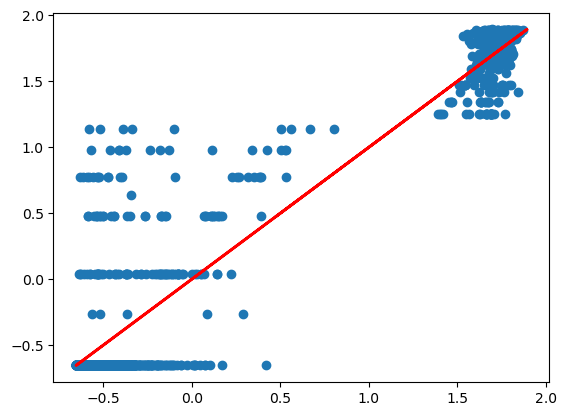

In [186]:
plt.scatter(pred,y1_test)
plt.plot(y1_test,y1_test,linewidth=2,color='Red')

# Saving The Model

In [187]:
#Saving the model using .pkl
import joblib
joblib.dump(Final_model,"RainFall_Pred.pkl")

['RainFall_Pred.pkl']

In [190]:
#Loading the saved model
pred=joblib.load("RainFall_Pred.pkl")

#Prediction
prediction = Final_model.predict(x1_test)
prediction

array([-0.51664814,  1.72293885, -0.65060217, ...,  0.21847145,
       -0.41147882,  1.71335725])

In [192]:
pd.DataFrame([Final_model.predict(x1_test)[:],y1_test[:]],index=["Predicted","Actual"])

0         1         2         3         4         5     \
Predicted -0.516648  1.722939 -0.650602 -0.617535 -0.617392 -0.533881   
Actual     0.478232  1.890977 -0.654076 -0.654076 -0.654076 -0.654076   

               6         7         8         9     ...      1588      1589  \
Predicted -0.542736  1.757514 -0.590104 -0.436175  ... -0.568171 -0.629121   
Actual    -0.654076  1.807798 -0.654076 -0.654076  ... -0.654076 -0.654076   

               1590      1591      1592      1593      1594      1595  \
Predicted -0.532437 -0.633332 -0.647771 -0.578232 -0.520816  0.218471   
Actual    -0.654076 -0.654076 -0.654076 -0.654076 -0.654076  0.040640   

               1596      1597  
Predicted -0.411479  1.713357  
Actual    -0.654076  1.852035  

[2 rows x 1598 columns]